# Analysis of TWAS colocalization with SuSiE-RSS

In [7]:
library("tidyverse")
library("mvsusieR")
c = read_delim("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/Pairwise/table_1_analysis_unit.txt",delim = "\t")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: mashr

Loading required package: ashr

Loading required package: susieR


── Column specification ────────────────────────────────────────────────────────
cols(
  `#filename` = col_character()
)




In [67]:
c = c%>%mutate(filename = str_remove_all(`#filename`,".uni_weight"),
        path = map_chr(filename,~paste(c("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_selected/",.x,".LDoriginal.mvsusierss.rds"),collapse = "")),
        model = map(path,~readRDS(.x)%>%tryCatch(error = function(e) return(NA))),
        eqtl_model_path = map_chr(filename,~paste(c("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/",.x,".LDoriginal.mvsusierss.rds"),collapse = "")),
        eqtl_model = map(eqtl_model_path,~readRDS(.x)%>%tryCatch(error = function(e) return(NA)))
          )%>%rename(X1 = `#filename`)

Warning message in gzfile(file, "rb"):
“cannot open compressed file '/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_selected/geneTpmResidualsAgeGenderAdj_rename.ENSG00000078487.LDoriginal.mvsusierss.rds', probable reason 'No such file or directory'”
Warning message in gzfile(file, "rb"):
“cannot open compressed file '/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_selected/geneTpmResidualsAgeGenderAdj_rename.ENSG00000196126.LDoriginal.mvsusierss.rds', probable reason 'No such file or directory'”
Warning message in gzfile(file, "rb"):
“cannot open compressed file '/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000078487.LDoriginal.mvsusierss.rds', probable reason 'No such file or directory'”
Warning message in gzfile(file, "rb"):
“cannot open compressed file '/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000196126.LDoriginal.mvsusierss.rds', probable reason 'No such file

In [68]:
c%>%filter(!is.na(model),!is.na(eqtl_model))%>%mutate(CS_snps = map(model,~.x$variable_names[.x$sets$cs%>%unlist]),eqtl_cs_snps = map(eqtl_model,~.x$variable_names[.x$sets$cs%>%unlist]),over_laps = map2(CS_snps, eqtl_cs_snps,~intersect(.x,.y)))%>%select(-model,-eqtl_model,-X1,-path)

filename,eqtl_model_path,CS_snps,eqtl_cs_snps,over_laps
<chr>,<chr>,<list>,<list>,<list>
geneTpmResidualsAgeGenderAdj_rename.ENSG00000002587,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000002587.LDoriginal.mvsusierss.rds,"4:11033136_A_G , 4:11025022_G_T , 4:11040290_C_T , 4:11037669_T_TA, 4:11038456_A_G , 4:11024168_A_G , 4:11023682_A_G , 4:11024682_C_G",,
geneTpmResidualsAgeGenderAdj_rename.ENSG00000064687,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000064687.LDoriginal.mvsusierss.rds,"19:1040382_A_G, 19:1044307_C_T","19:1032702_C_T, 19:1032756_C_T, 19:1033360_A_T",
geneTpmResidualsAgeGenderAdj_rename.ENSG00000073921,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000073921.LDoriginal.mvsusierss.rds,"11:85733815_C_CAT, 11:85750671_A_T , 11:85748386_C_T , 11:85734010_C_T",,
geneTpmResidualsAgeGenderAdj_rename.ENSG00000087589,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000087589.LDoriginal.mvsusierss.rds,,,
geneTpmResidualsAgeGenderAdj_rename.ENSG00000103510,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000103510.LDoriginal.mvsusierss.rds,"16:31155631_G_T, 16:31155630_C_G","16:31155631_G_T, 16:31155630_C_G","16:31155631_G_T, 16:31155630_C_G"
geneTpmResidualsAgeGenderAdj_rename.ENSG00000105383,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000105383.LDoriginal.mvsusierss.rds,,,
geneTpmResidualsAgeGenderAdj_rename.ENSG00000108798,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000108798.LDoriginal.mvsusierss.rds,,,
geneTpmResidualsAgeGenderAdj_rename.ENSG00000110077,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000110077.LDoriginal.mvsusierss.rds,"11:59962166_A_G, 11:60016387_A_T, 11:60013674_A_G, 11:60011013_C_T, 11:59957513_C_T","11:60091107_A_C, 11:60092650_A_T, 11:60099810_C_T, 11:60100079_A_T",
geneTpmResidualsAgeGenderAdj_rename.ENSG00000120885,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000120885.LDoriginal.mvsusierss.rds,"8:27464519_C_T, 8:27462481_A_G",,


In [69]:
TWAS_result = read_delim("/mnt/mfs/","\t")

Warning message in file(con, "rb"):
“'raw = FALSE' but '/mnt/mfs' is not a regular file”
Warning message in file(con, "rb"):
“cannot open file '/mnt/mfs': it is a directory”


ERROR: Error in file(con, "rb"): cannot open the connection


In [70]:
delta_result = read_delim("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/Pairwise/delta_result"," ",col_names = F)
delta_result = delta_result%>%mutate(filename = X1%>%str_remove(".LDoriginal.mvsusierss.stderr-Iteration"))%>%select(filename,"iteration" = X2,"delta" = X5)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_double()
)




In [71]:
delta_result

filename,iteration,delta
<chr>,<dbl>,<dbl>
geneTpmResidualsAgeGenderAdj_rename.ENSG00000002587,1000,8.189705e+01
geneTpmResidualsAgeGenderAdj_rename.ENSG00000064687,1000,5.061637e+02
geneTpmResidualsAgeGenderAdj_rename.ENSG00000073921,1000,6.078707e+01
geneTpmResidualsAgeGenderAdj_rename.ENSG00000087589,12,3.471907e-01
geneTpmResidualsAgeGenderAdj_rename.ENSG00000103510,1000,3.415957e+02
geneTpmResidualsAgeGenderAdj_rename.ENSG00000105383,2,2.618592e-03
geneTpmResidualsAgeGenderAdj_rename.ENSG00000108798,12,5.981849e-01
geneTpmResidualsAgeGenderAdj_rename.ENSG00000110077,1000,3.607112e+02
geneTpmResidualsAgeGenderAdj_rename.ENSG00000120885,1000,5.959089e+02


In [72]:
analysis = inner_join(c,delta_result,by = "filename")

In [73]:
analysis%>%select(-model,-eqtl_model)

X1,filename,path,eqtl_model_path,iteration,delta
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
geneTpmResidualsAgeGenderAdj_rename.ENSG00000002587,geneTpmResidualsAgeGenderAdj_rename.ENSG00000002587,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_selected/geneTpmResidualsAgeGenderAdj_rename.ENSG00000002587.LDoriginal.mvsusierss.rds,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000002587.LDoriginal.mvsusierss.rds,1000,8.189705e+01
geneTpmResidualsAgeGenderAdj_rename.ENSG00000064687,geneTpmResidualsAgeGenderAdj_rename.ENSG00000064687,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_selected/geneTpmResidualsAgeGenderAdj_rename.ENSG00000064687.LDoriginal.mvsusierss.rds,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000064687.LDoriginal.mvsusierss.rds,1000,5.061637e+02
geneTpmResidualsAgeGenderAdj_rename.ENSG00000073921,geneTpmResidualsAgeGenderAdj_rename.ENSG00000073921,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_selected/geneTpmResidualsAgeGenderAdj_rename.ENSG00000073921.LDoriginal.mvsusierss.rds,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000073921.LDoriginal.mvsusierss.rds,1000,6.078707e+01
geneTpmResidualsAgeGenderAdj_rename.ENSG00000087589,geneTpmResidualsAgeGenderAdj_rename.ENSG00000087589,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_selected/geneTpmResidualsAgeGenderAdj_rename.ENSG00000087589.LDoriginal.mvsusierss.rds,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000087589.LDoriginal.mvsusierss.rds,12,3.471907e-01
geneTpmResidualsAgeGenderAdj_rename.ENSG00000103510,geneTpmResidualsAgeGenderAdj_rename.ENSG00000103510,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_selected/geneTpmResidualsAgeGenderAdj_rename.ENSG00000103510.LDoriginal.mvsusierss.rds,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000103510.LDoriginal.mvsusierss.rds,1000,3.415957e+02
geneTpmResidualsAgeGenderAdj_rename.ENSG00000105383,geneTpmResidualsAgeGenderAdj_rename.ENSG00000105383,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_selected/geneTpmResidualsAgeGenderAdj_rename.ENSG00000105383.LDoriginal.mvsusierss.rds,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000105383.LDoriginal.mvsusierss.rds,2,2.618592e-03
geneTpmResidualsAgeGenderAdj_rename.ENSG00000108798,geneTpmResidualsAgeGenderAdj_rename.ENSG00000108798,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_selected/geneTpmResidualsAgeGenderAdj_rename.ENSG00000108798.LDoriginal.mvsusierss.rds,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000108798.LDoriginal.mvsusierss.rds,12,5.981849e-01
geneTpmResidualsAgeGenderAdj_rename.ENSG00000110077,geneTpmResidualsAgeGenderAdj_rename.ENSG00000110077,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_selected/geneTpmResidualsAgeGenderAdj_rename.ENSG00000110077.LDoriginal.mvsusierss.rds,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000110077.LDoriginal.mvsusierss.rds,1000,3.607112e+02
geneTpmResidualsAgeGenderAdj_rename.ENSG00000120885,geneTpmResidualsAgeGenderAdj_rename.ENSG00000120885,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_selected/geneTpmResidualsAgeGenderAdj_rename.ENSG00000120885.LDoriginal.mvsusierss.rds,/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_eqtl_ori/geneTpmResidualsAgeGenderAdj_rename.ENSG00000120885.LDoriginal.mvsusierss.rds,1000,5.959089e+02


In [77]:
coef_analysis = analysis%>%mutate(CS_snps = map(model,~.x$variable_names[.x$sets$cs%>%unlist]),
                  number_of_cs = map(model,~.x$sets$cs%>%length),
                  eqtl_cs_snps = map(eqtl_model,~.x$variable_names[.x$sets$cs%>%unlist]),
                  Cs_snps_coef = map(model,~.x$coef[.x$sets$cs%>%unlist+1,]),
                  eqtl_cs_snps_coef = map(eqtl_model,~.x$coef[.x$sets$cs%>%unlist+1,]),
                  Cs_snps_coef_colsum  = map(model,~.x$coef[.x$sets$cs%>%unlist+1,]%>%colSums()),
                  eqtl_cs_snps_coef_colsum  = map(model,~.x$coef[.x$sets$cs%>%unlist+1,]%>%colSums()),
                  over_laps = map2(CS_snps, eqtl_cs_snps,~intersect(.x,.y)),
                    gene_id = filename%>%str_remove("geneTpmResidualsAgeGenderAdj_rename."))%>%select(-model,-eqtl_model,-X1,-path)

In [78]:
coef_analysis%>%select(gene_id,iteration,number_of_cs,CS_snps,Cs_snps_coef_colsum,delta)%>%arrange(delta)%>%filter(gene_id == "ENSG00000134463")

gene_id,iteration,number_of_cs,CS_snps,Cs_snps_coef_colsum,delta
<chr>,<dbl>,<list>,<list>,<list>,<dbl>
ENSG00000134463,1000,3,"10:11822747_C_T, 10:11832356_C_T, 10:11825742_C_G","1.81374443, 1.40101628, 1.16783420, 0.09420199",0.002982563


In [79]:
old_result = c("10:11786415_A_G", "10:11797500_A_G", "10:11802849_A_G", "10:11809368_C_T", "10:11809948_A_G", "10:11821218_C_T", "10:11841338_A_G", "10:11841351_A_G")

In [102]:
coef_analysis%>%select(gene_id,iteration,number_of_cs,CS_snps,Cs_snps_coef,delta)%>%filter()

gene_id,iteration,number_of_cs,CS_snps,Cs_snps_coef,delta
<chr>,<dbl>,<list>,<list>,<list>,<dbl>
ENSG00000002587,1000,8,"4:11033136_A_G , 4:11025022_G_T , 4:11040290_C_T , 4:11037669_T_TA, 4:11038456_A_G , 4:11024168_A_G , 4:11023682_A_G , 4:11024682_C_G","-23.7936532, -126.6798686, -64.3675763, 334.0848931, -242.3738492, -24.5829945, 132.9205682, 13.5935308, -211.7084809, 65.4770683, -216.8854967, 909.4613152, -536.5356511, -243.1238419, 159.2822146, 73.8643820, 249.6627269, -0.1208283, 257.5128355, -723.7903983, 305.2471110, 135.7840344, -193.2962857, -30.1005276, 584.8877241, -487.5160502, 795.3090661, -2242.4395894, 941.5909363, 327.0029090, -233.5118167, 317.5896058",8.189705e+01
ENSG00000064687,1000,2,"19:1040382_A_G, 19:1044307_C_T","-2279.0638, 2281.3913, -2041.5928, 2045.4452, -229.0295, 230.9265, 62496.8743, -62503.0434",5.061637e+02
ENSG00000073921,1000,4,"11:85733815_C_CAT, 11:85750671_A_T , 11:85748386_C_T , 11:85734010_C_T","-604.4866, -12623.6089, 12630.0509, 597.5576, -414.9243, 132.2166, -172.9996, 454.8491, -353.7271, -4701.0838, 4695.6764, 358.7798, -1356.3951, 25136.8793, -25323.2238, 1537.3975",6.078707e+01
ENSG00000087589,12,0,,,3.471907e-01
ENSG00000103510,1000,2,"16:31155631_G_T, 16:31155630_C_G","56334.557, -56339.962, 53909.380, -53914.100, 1319.317, -1323.562, 12808.153, -12808.152",3.415957e+02
ENSG00000105383,2,0,,,2.618592e-03
ENSG00000108798,12,0,,,5.981849e-01
ENSG00000110077,1000,5,"11:59962166_A_G, 11:60016387_A_T, 11:60013674_A_G, 11:60011013_C_T, 11:59957513_C_T","6.553433e+01, -5.103664e+00, -1.095355e+04, 1.095728e+04, -6.652946e+01, 7.266545e+01, -1.696796e+00, -1.037512e+04, 1.037451e+04, -7.187340e+01, 5.125026e+01, 6.505384e-01, -8.008548e+02, 8.019551e+02, -5.267090e+01, 1.543065e+04, -9.065884e+02, 2.531601e+04, -2.441003e+04, -1.544553e+04",3.607112e+02
ENSG00000120885,1000,2,"8:27464519_C_T, 8:27462481_A_G","-20175.16, 20178.39, -14601.29, 14604.54, -10338.99, 10340.76, 40158.94, -40166.98",5.959089e+02


In [76]:
old_result

ERROR: Error in eval(expr, envir, enclos): object 'old_result' not found


In [81]:
TWAS_result = read_delim("/mnt/mfs/statgen/neuro-twas/whole_genome_0504/wgt/DLPFC/result/all_result.txt","\t")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  PANEL = col_logical(),
  CHR = col_double(),
  P0 = col_double(),
  P1 = col_double(),
  HSQ = col_double(),
  EQTL.ID = col_logical(),
  EQTL.R2 = col_logical(),
  EQTL.Z = col_logical(),
  EQTL.GWAS.Z = col_logical(),
  MODELCV.R2 = col_logical(),
  MODELCV.PV = col_logical()
)
ℹ Use `spec()` for the full column specifications.


Warning message:
“231 parsing failures.
 row   col           expected actual                                                                            file
1689 PANEL 1/0/T/F/TRUE/FALSE  PANEL '/mnt/mfs/statgen/neuro-twas/whole_genome_0504/wgt/DLPFC/result/all_result.txt'
1689 CHR   a double            CHR   '/mnt/mfs/statgen/neuro-twas/whole_genome_0504/wgt/DLPFC/result/all_result.txt'
1689 P0    a double            P0    '/mnt/mfs/statgen/neuro-twas/whole_genome_0504/wgt/DLPFC/result/all_result.txt'
1689 P1    a double            P1    '

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 4.2 height: 2.8 


$plot

$width
[1] 4.2

$height
[1] 2.8


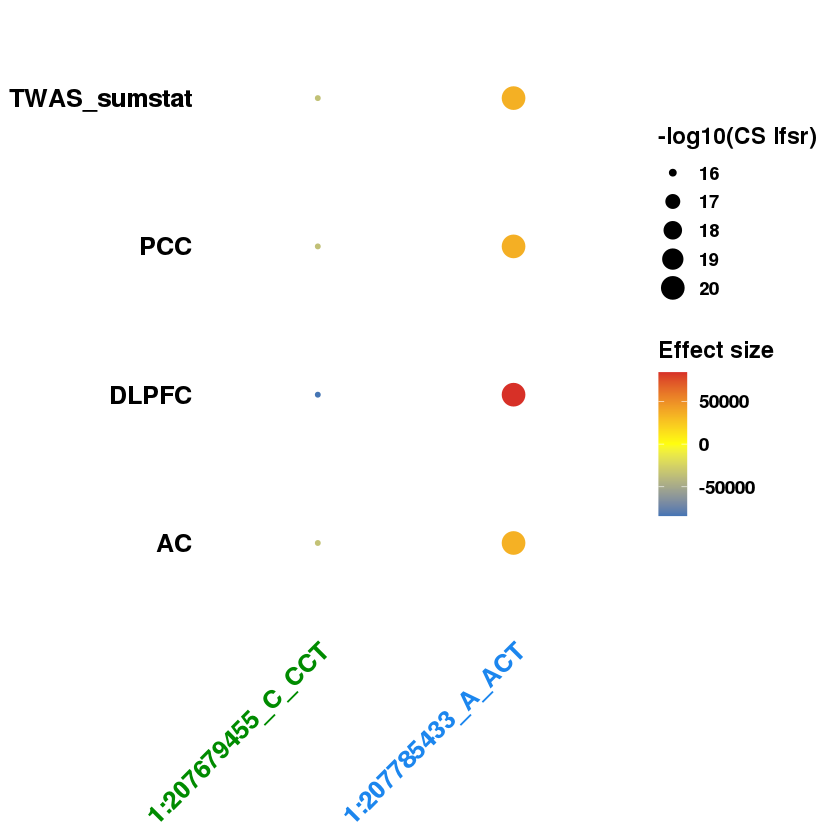

In [87]:
(c%>%filter(str_detect(filename,"ENSG00000203710"))%>%pull(model))[[1]]%>%mvsusie_plot

In [82]:
vis = coef_analysis%>%select(gene_id,iteration,number_of_cs,CS_snps,Cs_snps_coef,Cs_snps_coef_colsum,delta)%>%arrange(delta)

In [84]:
TWAS_result%>%select(ID,TWAS.P)%>%inner_join(vis,by = c("ID" = "gene_id"))%>%arrange(delta)%>%filter(ID == "ENSG00000203710" )

ID,TWAS.P,iteration,number_of_cs,CS_snps,Cs_snps_coef,Cs_snps_coef_colsum,delta
<chr>,<chr>,<dbl>,<list>,<list>,<list>,<list>,<dbl>
ENSG00000203710,9.91e-20,1000,2,"1:207785433_A_ACT, 1:207679455_C_CCT","34913.04, -34916.45, 84074.73, -84081.60, 36053.24, -36055.87, 35681.92, -35684.52","-3.406272, -6.865644, -2.633867, -2.602428",301.2812


In [85]:
TWAS_result%>%select(ID,TWAS.P)%>%inner_join(vis,by = c("ID" = "gene_id"))%>%arrange(delta)%>%filter(number_of_cs > 0,ID == "ENSG00000203710")

34913.04,84074.73,36053.24,35681.92
-34916.45,-84081.60,-36055.87,-35684.52


In [ ]:
TWAS_result%>%select(ID,TWAS.P)%>%inner_join(vis,by = c("ID" = "gene_id"))%>%arrange(delta)

In [85]:
ori = attach("/mnt/mfs/statgen/neuro-twas/mv_wg/result_arch/geneTpmResidualsAgeGenderAdj_rename.ENSG00000161929.mv_susie.model.RData")

In [86]:
model = ori$m_ENSG00000161929

In [95]:
new_model = (c%>%filter(filename == "geneTpmResidualsAgeGenderAdj_rename.ENSG00000161929")%>%pull(model))[[1]]

In [96]:
new_model$sets$cs

$L1
[1] 1225

$L2
[1] 1131

$L3
[1] 919

$L4
[1] 940

In [87]:
model$sets$cs

$L1
 [1] 1383 1387 1389 1392 1393 1394 1401 1409 1418 1419 1421

In [97]:
new_model%>%mvsusie_plot 

ERROR: Error in mvsusie_plot(.): could not find function "mvsusie_plot"


In [98]:
11809948 - pos_1
11826555 - pos_1
11841351 - pos_1

[1] -12799 -15794 -22408

[1]  3808   813 -5801

[1] 18604 15609  8995

In [30]:
intersect(new_cs_snp,old_cs_snp)

character(0)

961.50682, -1637.34648, 677.65340, 690.07341, 
-1255.35575, 566.68336, 631.98275, -1141.38601, 
510.57110, -28.48202, 169.88128, -141.30505

In [33]:
colnames(coef_analysis)

[1] "filename"                 "eqtl_model_path"         
 [3] "iteration"                "delta"                   
 [5] "CS_snps"                  "number_of_cs"            
 [7] "eqtl_cs_snps"             "Cs_snps_coef"            
 [9] "eqtl_cs_snps_coef"        "Cs_snps_coef_colsum"     
[11] "eqtl_cs_snps_coef_colsum" "over_laps"               
[13] "gene_id"

Loading required package: mashr

Loading required package: ashr

Loading required package: susieR



In [36]:
colnames(c)

[1] "X1"              "filename"        "path"            "model"          
[5] "eqtl_model_path" "eqtl_model"

In [75]:
model = (c%>%filter(filename == "geneTpmResidualsAgeGenderAdj_rename.ENSG00000134463")%>%pull(model))[[1]]

In [71]:
model%>%saveRDS("~/geneTpmResidualsAgeGenderAdj_rename.ENSG00000134463.rss.rds")

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 5.4 height: 2.8 


$plot

$width
[1] 5.4

$height
[1] 2.8


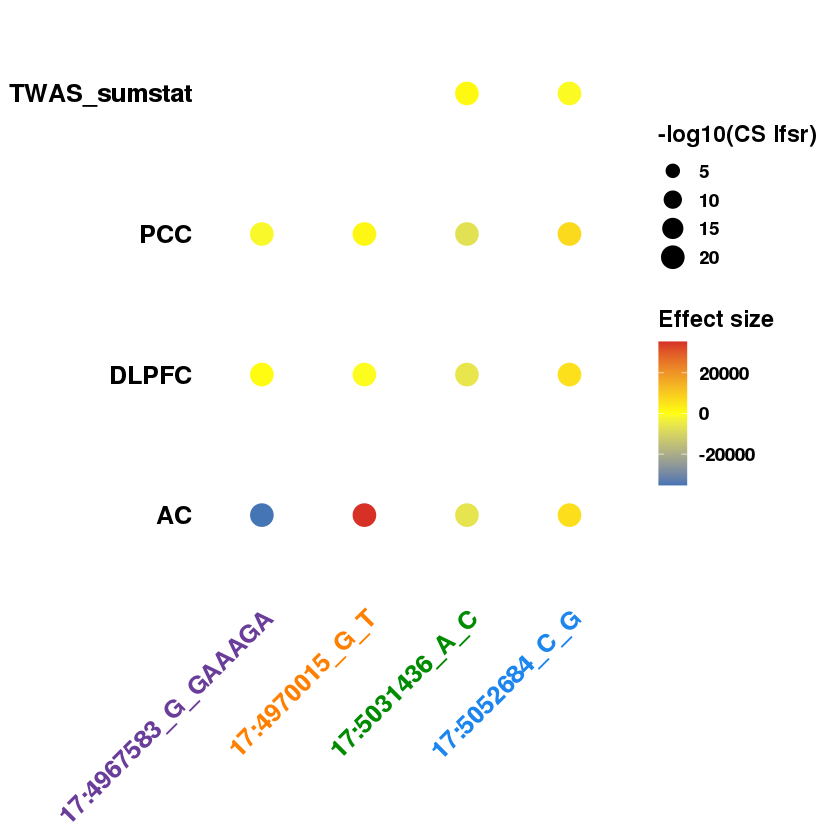

In [100]:
a = mvsusie_plot(new_model)
a

In [64]:
model$condition_names[[4]] = "GWAS_Sumstat"

In [72]:
a = readRDS("/home/hs3163/geneTpmResidualsAgeGenderAdj_rename.ENSG00000134463.rss.rds")

In [1]:
input = readRDS("/mnt/mfs//statgen/neuro-twas/TWAS_sumstat/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000134463.uni_weight.rds")

In [33]:
R = readRDS("/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/LD/geneTpmResidualsAgeGenderAdj_rename.ENSG00000134463.merged.ld.rds")

In [31]:
cbind("SNP" = input$snps,input$bhat/(input$sbhat)%>%as_tibble())%>%arrange(TWAS_sumstat%>%as.numeric)%>%pull(SNP)%in%new_cs_snp%>%which

[1] 1931 5461 5490

In [34]:
input$Z = input$bhat/(input$sbhat)

In [40]:
R = R[which(rownames(R)%in%input$snps),which(colnames(R)%in%input$snps)]

In [46]:
input$Z%>%as_tibble()%>%cbind('SNP' = rownames(R) )%>%arrange(-TWAS_sumstat)%>%pull("SNP")%in%new_cs_snp%>%which

[1]  440 3050 3063

In [49]:
dat[c(440,3050,3063),]

,AC,DLPFC,PCC,TWAS_sumstat,SNP
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
440,-9.948586,-7.246548,-6.734495,0.781457,10:11832356_C_T
3050,10.113545,7.139614,6.441734,NA,10:11822747_C_T
3063,-6.356023,-4.259189,-4.085766,NA,10:11825742_C_G


In [47]:
dat = input$Z%>%as_tibble()%>%cbind('SNP' = rownames(R) )%>%arrange(-TWAS_sumstat)

In [ ]:
input$Z = input$Z[which(input$snps%in%rownames(R)),]



In [101]:

c%>%select(`#filename` = filename)%>%write_delim("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/Pairwise/table_1_analysis_unit.txt","\t")

In [103]:
e = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss.ed_bovy.rds")

## Pairwise

In [3]:
pw = c%>%mutate(filename = str_remove_all(`#filename`,".uni_weight"),
        path = map_chr(filename,~paste(c("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/Pairwise/",.x,".LDoriginal.mvsusierss.rds"),collapse = "")),
        model = map(path,~readRDS(.x)%>%tryCatch(error = function(e) return(NA)))
          )

Warning message in gzfile(file, "rb"):
“cannot open compressed file '/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/Pairwise/geneTpmResidualsAgeGenderAdj_rename.ENSG00000078487.LDoriginal.mvsusierss.rds', probable reason 'No such file or directory'”
Warning message in gzfile(file, "rb"):
“cannot open compressed file '/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/Pairwise/geneTpmResidualsAgeGenderAdj_rename.ENSG00000196126.LDoriginal.mvsusierss.rds', probable reason 'No such file or directory'”


In [6]:
pw_analysis = inner_join(pw,delta_result,by = "filename")

In [17]:
pw_model = (pw_analysis%>%filter(`filename` == "geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710")%>%pull(model))[[1]]

In [26]:
pw_model$condition_names[2] = "GWAS_sumstat"

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 7.8 height: 1.4 


$plot

$width
[1] 7.8

$height
[1] 1.4


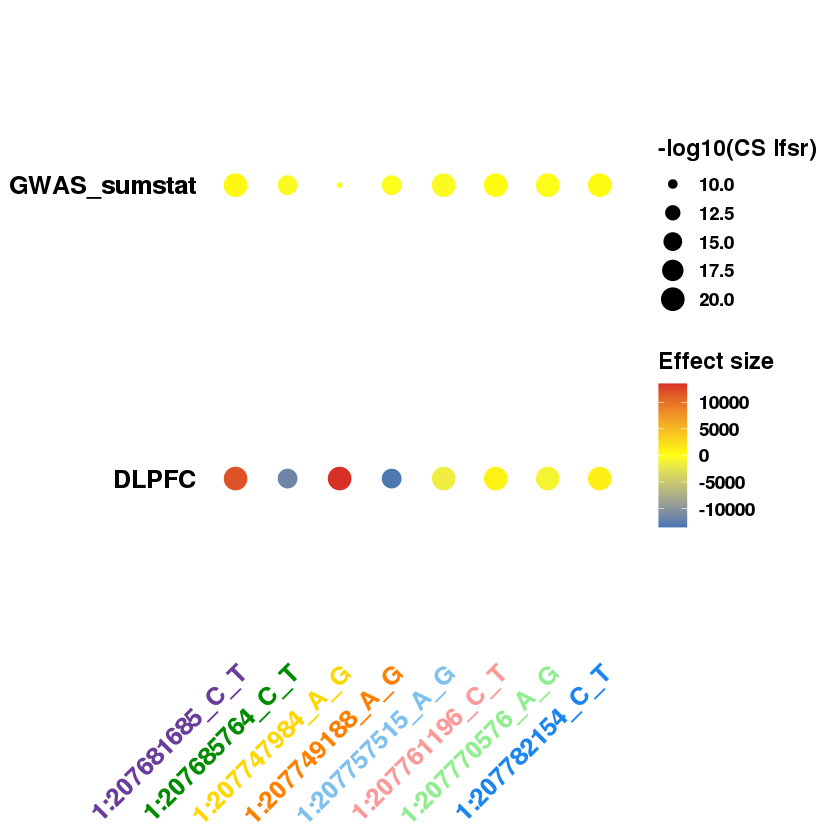

In [27]:
pw_model%>%mvsusie_plot()

In [35]:
pw_model$sets$cs
ori$sets$cs

$L1
[1] 1727

$L2
[1] 1606

$L3
[1] 1595

$L4
[1] 1660

$L5
[1] 1656

$L6
[1] 1680

$L7
[1] 1688

$L8
[1] 1710

$L1
 [1] 1596 1602 1617 1642 1649 1657 1728 1733 1735 1737

In [1]:
ori = attach("/mnt/mfs/statgen/neuro-twas/mv_wg/result_arch/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.RData")

In [2]:
ori = ori$m_ENSG00000203710

In [5]:
length(ori$pip)

[1] 3089

In [13]:
coef_analysis = pw_analysis%>%mutate(CS_snps = map(model,~.x$variable_names[.x$sets$cs%>%unlist]),
                  number_of_cs = map(model,~.x$sets$cs%>%length),
                  Cs_snps_coef = map(model,~.x$coef[.x$sets$cs%>%unlist+1,]),
                  Cs_snps_coef_colsum  = map(model,~.x$coef[.x$sets$cs%>%unlist+1,]%>%colSums()),
                    gene_id = filename%>%str_remove("geneTpmResidualsAgeGenderAdj_rename."))%>%select(-model,-path,-`#filename`)

In [53]:
new_cs_snps = (coef_analysis%>%filter(number_of_cs >0,gene_id == "ENSG00000203710")%>%pull(CS_snps))[[1]]

In [63]:
coef_analysis%>%filter(number_of_cs >0,gene_id == "ENSG00000203710")

filename,iteration,delta,CS_snps,number_of_cs,Cs_snps_coef,Cs_snps_coef_colsum,gene_id
<chr>,<dbl>,<dbl>,<list>,<list>,<list>,<list>,<chr>
geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710,1000,301.2812,"1:207782154_C_T, 1:207685764_C_T, 1:207681685_C_T, 1:207749188_A_G, 1:207747984_A_G, 1:207757515_A_G, 1:207761196_C_T, 1:207770576_A_G",8,"1146.1901, -11729.4797, 11900.1940, -13209.8726, 13506.9946, -1597.9798, 959.8748, -967.5169, 271.3666, -458.6323, 459.9272, -253.9922, 195.9486, -353.9470, 320.1885, -177.4507","8.404473, 3.408708",ENSG00000203710


In [37]:
coef_analysis%>%filter(number_of_cs >0,gene_id == "ENSG00000203710")%>%pull(Cs_snps_coef)

1146.1901,271.3666
-11729.4797,-458.6323
11900.1940,459.9272
-13209.8726,-253.9922
13506.9946,195.9486
-1597.9798,-353.9470
959.8748,320.1885
-967.5169,-177.4507


In [115]:
input = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")
input_1 = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/Pairwise_2/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")

In [37]:
R = readRDS("/home/hs3163/Project/Genome_prior/DLPFC/cache/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.ld.rds")

In [113]:
input$bhat%>%nrow
input$Z = input$bhat/(input$sbhat)
input$Z = input$Z%>%as_tibble()%>%cbind('SNP' = input$snps )

[1] 4396

In [114]:
input$bhat%>%nrow
input$Z = input$bhat/(input$sbhat)
input$Z = input$Z%>%as_tibble()%>%cbind('SNP' = input$snps )
R = R[which(rownames(R)%in%input$snps),which(colnames(R)%in%input$snps)]
input$Z = input$Z[which(input$snps%in%rownames(R)),]
input$Z%>%nrow
nrow(R)

[1] 2497

[1] 2497

In [62]:
input$Z%>%arrange(-TWAS_sumstat)%>%mutate(Rank = 1:2497)%>%filter(SNP%in%new_cs_snps)

AC,DLPFC,PCC,TWAS_sumstat,SNP,Rank
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
4.0488021,11.83270986,5.4917236,7.971591,1:207786828_A_G,3
4.0488021,11.83270986,5.4917236,7.965909,1:207784968_A_G,4
3.4552060,10.42458462,4.9798055,5.390411,1:207789269_A_G,15
0.1145730,0.16764067,-0.5346922,-1.959821,1:207688746_A_G,1156
0.1145730,0.01665601,-0.3747902,-2.337838,1:207785433_A_ACT,1231
-0.2980362,-3.68948160,-2.2502018,-2.613924,1:207764844_G_GA,1267
0.1145730,0.01665601,-0.3747902,NA,1:207679455_C_CCT,2079
-3.4030223,-6.83452018,-2.5351374,NA,1:207800862_G_T,2148


In [123]:
model = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_1/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds")

In [124]:
model$variable_names[model$sets$cs%>%unlist] -> new_cs_snps

In [126]:
coef = model$coef[model$sets$cs%>%unlist+1,]
rownames(coef) = new_cs_snps
coef[]

1:207688746_A_G,21.51019,104.2390,36.00173,169.1711
1:207679455_C_CCT,-6953.84469,-16784.8970,-7190.44305,-7254.0853
1:207789269_A_G,261.10533,838.0491,370.10671,551.7552
1:207800862_G_T,240.31690,774.0704,340.61559,510.7116
1:207785433_A_ACT,7023.00831,16970.8888,7282.45164,7275.5365
1:207764844_G_GA,245.04240,786.6852,346.79203,519.7730
1:207784968_A_G,7930.42956,22783.4887,11429.25602,-20397.0589
1:207786828_A_G,-7934.77863,-22796.9159,-11436.17211,20391.0889


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 7.8 height: 2.8 


$plot

$width
[1] 7.8

$height
[1] 2.8


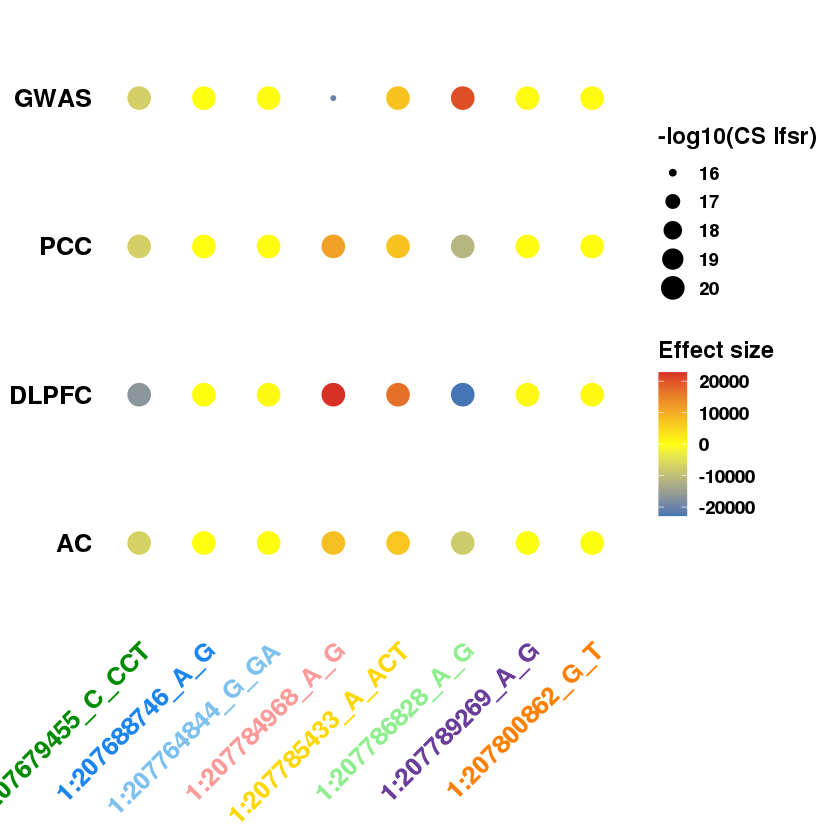

In [71]:
model%>%mvsusie_plot()

In [70]:
model$condition_names[4] = "GWAS"

In [67]:
model$variable_names[c(1596,1737)]

[1] "1:207679455_C_CCT" "1:207784968_A_G"

In [115]:
model$coef[c(1596,1737)+1,]

-6953.845,-16784.90,-7190.443,-7254.085
7930.430,22783.49,11429.256,-20397.059


In [2]:
R = readRDS("/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.merged.ld.rds")

In [15]:
R[which(rownames(R) %in% new_cs_snps),which(rownames(R) %in% new_cs_snps) ]

,1:207679455_C_CCT,1:207688746_A_G,1:207764844_G_GA,1:207784968_A_G,1:207785433_A_ACT,1:207786828_A_G,1:207789269_A_G,1:207800862_G_T
1:207679455_C_CCT,1.0000000,0.9891610,-0.108519,-0.0542651,1.0000000,-0.0542651,-0.130390,-0.110100
1:207688746_A_G,0.9891610,1.0000000,-0.112509,-0.0513753,0.9891610,-0.0513753,-0.126315,-0.106705
1:207764844_G_GA,-0.1085190,-0.1125090,1.000000,-0.2987050,-0.1085190,-0.2987050,-0.504329,-0.418953
1:207784968_A_G,-0.0542651,-0.0513753,-0.298705,1.0000000,-0.0542651,1.0000000,0.641346,-0.353457
1:207785433_A_ACT,1.0000000,0.9891610,-0.108519,-0.0542651,1.0000000,-0.0542651,-0.130390,-0.110100
1:207786828_A_G,-0.0542651,-0.0513753,-0.298705,1.0000000,-0.0542651,1.0000000,0.641346,-0.353457
1:207789269_A_G,-0.1303900,-0.1263150,-0.504329,0.6413460,-0.1303900,0.6413460,1.000000,-0.498675
1:207800862_G_T,-0.1101000,-0.1067050,-0.418953,-0.3534570,-0.1101000,-0.3534570,-0.498675,1.000000


In [72]:
input$Z%>%arrange(-TWAS_sumstat)%>%mutate(Rank = 1:2497)%>%filter(SNP%in%new_cs_snps)%>%rename(GWAS = TWAS_sumstat)%>%filter(Rank %in% c(3,4,2079))

AC,DLPFC,PCC,GWAS,SNP,Rank
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
4.048802,11.83270986,5.4917236,7.971591,1:207786828_A_G,3
4.048802,11.83270986,5.4917236,7.965909,1:207784968_A_G,4
0.114573,0.01665601,-0.3747902,NA,1:207679455_C_CCT,2079


In [43]:
input_1$Z%>%as_tibble()%>%cbind('SNP' = rownames(R) )%>%rename(GWAS = TWAS_sumstat)%>%arrange(-GWAS)%>%pull("SNP")%in%(new_cs_snps)%>%which

[1]   15  371  694 1150 2115 2143 2156 2157

In [44]:
dat = input_1$Z%>%as_tibble()%>%cbind('SNP' = rownames(R) )%>%rename(GWAS = TWAS_sumstat)%>%arrange(-GWAS)

In [3]:
GWAS = read_delim("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/Data/GCST90012877_buildGRCh37_colrenamed_trimmed.txt","\t")


── Column specification ────────────────────────────────────────────────────────
cols(
  variant_id = col_character(),
  P = col_double(),
  CHR = col_double(),
  BP = col_double(),
  A1 = col_character(),
  A2 = col_character(),
  SNP = col_character(),
  GWAS_BETA = col_double(),
  GWAS_SE = col_double(),
  GWAS_P = col_double(),
  SNP_ID = col_character()
)




In [53]:
GWAS%>%filter(SNP_ID %in% new_cs_snps)%>%mutate(GWAS_Z = GWAS_BETA/GWAS_SE)

variant_id,P,CHR,BP,A1,A2,SNP,GWAS_BETA,GWAS_SE,GWAS_P,SNP_ID,GWAS_Z
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
rs115924259,2.160894e-01,1,207688746,A,G,rs115924259,-0.0878,0.0448,4.986e-02,1:207688746_A_G,-1.959821
1_207764844_GA_G,3.601677e-05,1,207764844,G,GA,1:207764844_GA_G,-0.0413,0.0158,8.755e-03,1:207764844_G_GA,-2.613924
rs3818361,4.692884e-22,1,207784968,A,G,rs3818361,0.1402,0.0176,1.717e-15,1:207784968_A_G,7.965909
1_207785433_ACT_A,8.838030e-02,1,207785433,A,ACT,1:207785433_ACT_A,-0.1038,0.0444,1.948e-02,1:207785433_A_ACT,-2.337838
rs2093760,4.378962e-22,1,207786828,A,G,rs2093760,0.1403,0.0176,1.666e-15,1:207786828_A_G,7.971591
rs11576522,8.175286e-12,1,207789269,A,G,rs11576522,0.0787,0.0146,6.560e-08,1:207789269_A_G,5.390411


In [30]:
input$snps%>%length

[1] 4396

In [ ]:
a%>%read_delim("")

In [19]:
head(dat)

,DLPFC,GWAS,SNP
,<dbl>,<dbl>,<chr>
1,11.44956,8.054945,1:207799880_A_G
2,11.94170,8.044944,1:207738077_C_T
3,11.83271,7.971591,1:207786152_A_G
4,11.83271,7.965909,1:207782154_C_T
5,11.83271,7.965909,1:207782931_A_G
6,11.40428,7.960674,1:207791853_C_T


In [89]:
R[rownames() ]

,1:206996355_A_G,1:206996384_C_T,1:206996552_A_C,1:206996894_C_CT,1:206997110_A_AG,1:206997674_C_T,1:206997684_C_T,1:206997892_C_G,1:206998337_A_G,1:206998706_A_T,...,1:207993102_A_G,1:207993224_A_C,1:207993339_C_G,1:207993418_C_CA,1:207993637_A_G,1:207993699_A_G,1:207994031_C_T,1:207994429_C_T,1:207995078_C_T,1:207995322_C_CAA
1:206996355_A_G,1.00000e+00,0.005231530,3.43456e-03,1.44849e-03,5.56799e-05,0.000840196,3.43456e-03,0.41854000,4.48509e-03,1.00000e+00,...,2.81824e-04,1.03840e-02,5.15499e-04,2.63100e-05,1.11090e-03,1.35781e-03,7.00633e-04,0.004813250,9.90667e-04,4.44908e-05
1:206996384_C_T,5.23153e-03,1.000000000,1.74694e-03,2.51983e-03,4.69324e-03,0.001018200,1.74694e-03,0.01504270,4.02040e-04,5.23153e-03,...,7.57832e-06,1.18396e-03,4.20273e-04,1.45863e-03,5.11684e-05,9.06229e-04,1.63740e-04,0.000645937,4.71964e-04,1.80417e-03
1:206996552_A_C,3.43456e-03,0.001746940,1.00000e+00,8.14067e-04,8.14067e-04,0.000602026,1.00000e+00,0.00627750,3.33319e-04,3.43456e-03,...,2.79754e-03,8.17819e-04,1.99845e-03,5.81090e-04,2.78626e-04,8.20885e-06,5.40718e-04,0.001996150,2.05393e-03,1.41731e-03
1:206996894_C_CT,1.44849e-03,0.002519830,8.14067e-04,1.00000e+00,1.03580e-03,0.000658307,8.14067e-04,0.07794790,4.09535e-07,1.44849e-03,...,5.28867e-04,4.96103e-06,1.36841e-03,1.54952e-04,8.68441e-05,2.08061e-05,5.91267e-04,0.000560803,1.33621e-03,5.02794e-05
1:206997110_A_AG,5.56799e-05,0.004693240,8.14067e-04,1.03580e-03,1.00000e+00,0.000658307,8.14067e-04,0.00246817,2.35511e-03,5.56799e-05,...,2.54981e-03,4.96103e-06,4.09994e-06,7.39368e-04,3.23388e-03,1.76138e-03,5.91267e-04,0.011918500,3.61728e-04,6.96240e-04
1:206997674_C_T,8.40196e-04,0.001018200,6.02026e-04,6.58307e-04,6.58307e-04,1.000000000,6.02026e-04,0.00368464,1.49680e-03,8.40196e-04,...,9.48036e-03,6.61341e-04,1.27345e-03,4.69907e-04,1.97963e-03,1.67392e-03,3.75781e-04,0.000864182,1.24995e-03,1.55528e-05
1:206997684_C_T,3.43456e-03,0.001746940,1.00000e+00,8.14067e-04,8.14067e-04,0.000602026,1.00000e+00,0.00627750,3.33319e-04,3.43456e-03,...,2.79754e-03,8.17819e-04,1.99845e-03,5.81090e-04,2.78626e-04,8.20885e-06,5.40718e-04,0.001996150,2.05393e-03,1.41731e-03
1:206997892_C_G,4.18540e-01,0.015042700,6.27750e-03,7.79479e-02,2.46817e-03,0.003684640,6.27750e-03,1.00000000,1.50012e-01,4.18540e-01,...,7.02922e-05,2.59979e-03,5.25220e-05,6.29743e-04,7.02518e-04,3.53655e-04,3.07764e-04,0.001926650,8.95129e-05,2.95827e-04
1:206998337_A_G,4.48509e-03,0.000402040,3.33319e-04,4.09535e-07,2.35511e-03,0.001496800,3.33319e-04,0.15001200,1.00000e+00,4.48509e-03,...,4.49847e-03,2.36596e-03,3.96636e-05,3.84268e-03,1.78841e-03,1.21550e-03,1.34437e-03,0.000135512,2.84999e-04,1.04949e-04
1:206998706_A_T,1.00000e+00,0.005231530,3.43456e-03,1.44849e-03,5.56799e-05,0.000840196,3.43456e-03,0.41854000,4.48509e-03,1.00000e+00,...,2.81824e-04,1.03840e-02,5.15499e-04,2.63100e-05,1.11090e-03,1.35781e-03,7.00633e-04,0.004813250,9.90667e-04,4.44908e-05


In [100]:
which(rownames(R) == "1:207679455_C_CCT")

[1] 1593

In [92]:
R[c(1593,1735),c(1593,1735)]

,1:207679455_C_CCT,1:207785433_A_ACT
1:207679455_C_CCT,1,1
1:207785433_A_ACT,1,1


In [ ]:
1:207785433_A_ACT,

In [2]:
model = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_1/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds")

In [95]:
model$variable_names[model$sets$cs%>%unlist] -> new_cs_snps

In [74]:
coef = model$coef[model$sets$cs%>%unlist+1,]
rownames(coef) = new_cs_snps
coef[c(2,7,8),]

1:207679455_C_CCT,-6953.845,-16784.90,-7190.443,-7254.085
1:207784968_A_G,7930.430,22783.49,11429.256,-20397.059
1:207786828_A_G,-7934.779,-22796.92,-11436.172,20391.089


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 7.8 height: 2.8 


$plot

$width
[1] 7.8

$height
[1] 2.8


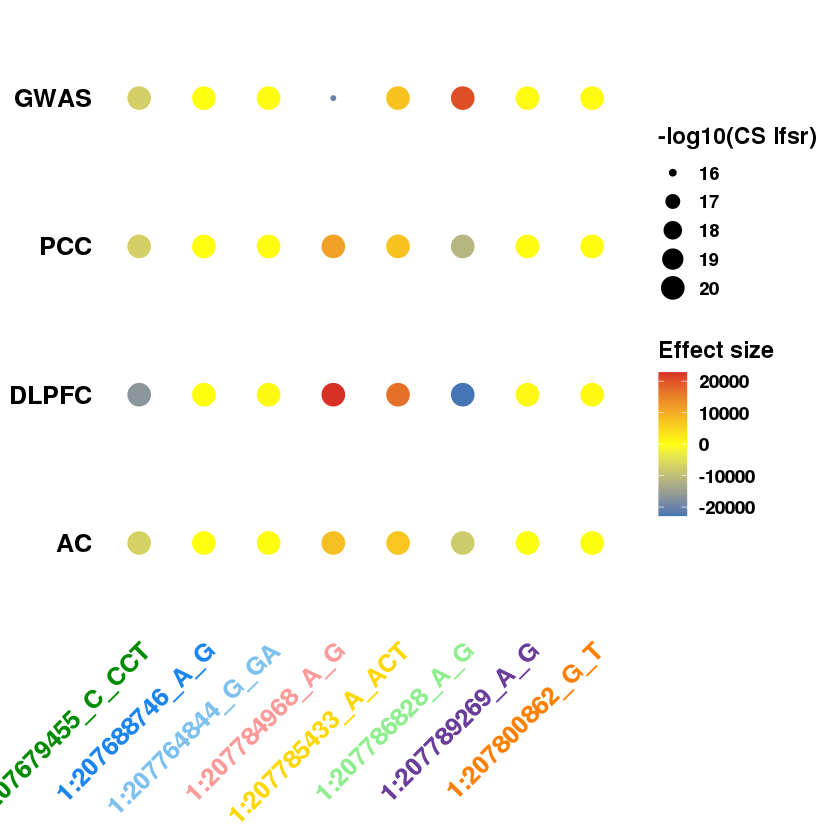

In [71]:
model%>%mvsusie_plot()

In [70]:
model$condition_names[4] = "GWAS"

In [67]:
model$variable_names[c(1596,1737)]

[1] "1:207679455_C_CCT" "1:207784968_A_G"

In [115]:
model$coef[c(1596,1737)+1,]

-6953.845,-16784.90,-7190.443,-7254.085
7930.430,22783.49,11429.256,-20397.059


In [2]:
R = readRDS("/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.merged.ld.rds")

In [15]:
R[which(rownames(R) %in% new_cs_snps),which(rownames(R) %in% new_cs_snps) ]

,1:207679455_C_CCT,1:207688746_A_G,1:207764844_G_GA,1:207784968_A_G,1:207785433_A_ACT,1:207786828_A_G,1:207789269_A_G,1:207800862_G_T
1:207679455_C_CCT,1.0000000,0.9891610,-0.108519,-0.0542651,1.0000000,-0.0542651,-0.130390,-0.110100
1:207688746_A_G,0.9891610,1.0000000,-0.112509,-0.0513753,0.9891610,-0.0513753,-0.126315,-0.106705
1:207764844_G_GA,-0.1085190,-0.1125090,1.000000,-0.2987050,-0.1085190,-0.2987050,-0.504329,-0.418953
1:207784968_A_G,-0.0542651,-0.0513753,-0.298705,1.0000000,-0.0542651,1.0000000,0.641346,-0.353457
1:207785433_A_ACT,1.0000000,0.9891610,-0.108519,-0.0542651,1.0000000,-0.0542651,-0.130390,-0.110100
1:207786828_A_G,-0.0542651,-0.0513753,-0.298705,1.0000000,-0.0542651,1.0000000,0.641346,-0.353457
1:207789269_A_G,-0.1303900,-0.1263150,-0.504329,0.6413460,-0.1303900,0.6413460,1.000000,-0.498675
1:207800862_G_T,-0.1101000,-0.1067050,-0.418953,-0.3534570,-0.1101000,-0.3534570,-0.498675,1.000000


In [72]:
input$Z%>%arrange(-TWAS_sumstat)%>%mutate(Rank = 1:2497)%>%filter(SNP%in%new_cs_snps)%>%rename(GWAS = TWAS_sumstat)%>%filter(Rank %in% c(3,4,2079))%>%pull(SNP)

AC,DLPFC,PCC,GWAS,SNP,Rank
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
4.048802,11.83270986,5.4917236,7.971591,1:207786828_A_G,3
4.048802,11.83270986,5.4917236,7.965909,1:207784968_A_G,4
0.114573,0.01665601,-0.3747902,NA,1:207679455_C_CCT,2079


AC,DLPFC,PCC,TWAS_sumstat
0.001829300,0.0083648705,0.0172554887,-0.0244
0.057652641,0.0777235966,0.0570366723,NA
-0.002590476,-0.0243250808,0.0028843296,-0.0040
0.002565278,-0.0189151856,0.0005988672,NA
0.003849819,-0.0398376552,-0.0342613242,-0.0233
-0.002590476,-0.0243250808,0.0028843296,NA
0.024445108,0.0105319373,0.0047475620,-0.0006
0.012386965,0.0351482243,0.0393312204,0.0085
0.001829300,0.0083648705,0.0172554887,0.0225
0.009187638,-0.0149994512,0.0104211815,NA


In [110]:
input$Z%>%arrange(-TWAS_sumstat)%>%mutate(Rank = 1:2497)%>%filter(SNP%in%new_cs_snps)%>%rename(GWAS = TWAS_sumstat)%>%filter(Rank %in% c(3,4,2079))%>%pull(SNP)

ERROR: Error in UseMethod("arrange"): no applicable method for 'arrange' applied to an object of class "NULL"


In [96]:
intersect(new_cs_snps_bv,new_cs_snps)

character(0)

In [101]:
model_bv = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/Pairwise_2/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds")

In [102]:
model_bv$variable_names[model$sets$cs%>%unlist] -> new_cs_snps_bv

In [103]:
new_cs_snps_bv

[1] "1:207782154_C_T" "1:207685764_C_T" "1:207681685_C_T" "1:207749188_A_G"
[5] "1:207747984_A_G" "1:207757515_A_G" "1:207761196_C_T" "1:207770576_A_G"

In [105]:
coef_bv = model_bv$coef[model_bv$sets$cs%>%unlist+1,]
rownames(coef_bv) = new_cs_snps_bv
coef_bv

1:207782154_C_T,1146.1901,271.3666
1:207685764_C_T,-11729.4797,-458.6323
1:207681685_C_T,11900.1940,459.9272
1:207749188_A_G,-13209.8726,-253.9922
1:207747984_A_G,13506.9946,195.9486
1:207757515_A_G,-1597.9798,-353.9470
1:207761196_C_T,959.8748,320.1885
1:207770576_A_G,-967.5169,-177.4507


In [120]:
model1 = model

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 7.8 height: 1.4 


$plot

$width
[1] 7.8

$height
[1] 1.4


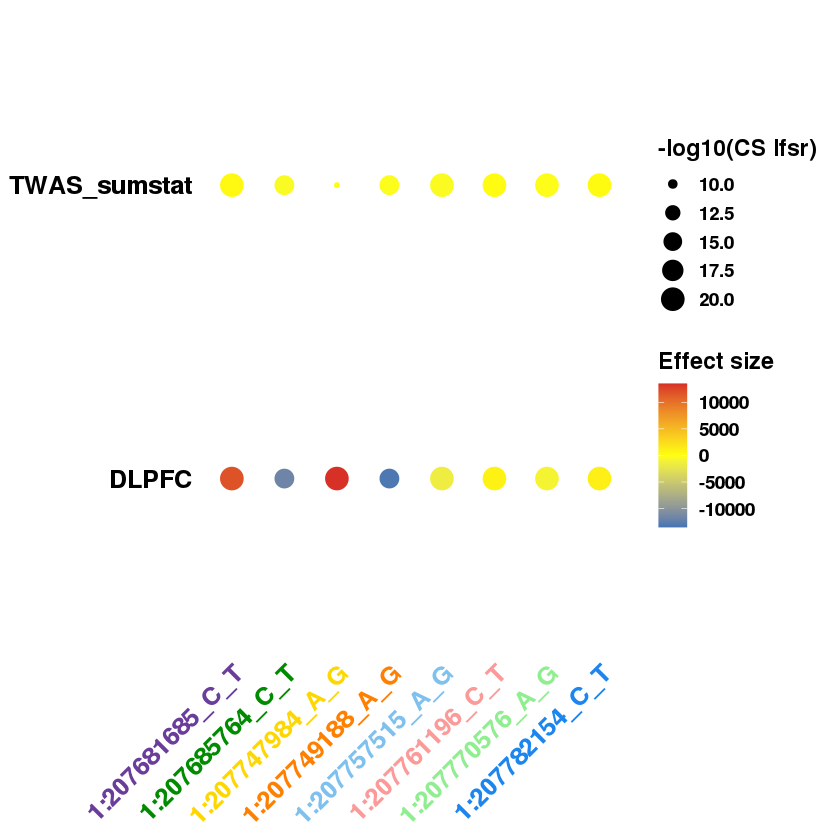

In [122]:
model1%>%mvsusie_plot

In [107]:
model_bv$condition_names[2] = "GWAS SumStat"

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 7.8 height: 1.4 


$plot

$width
[1] 7.8

$height
[1] 1.4


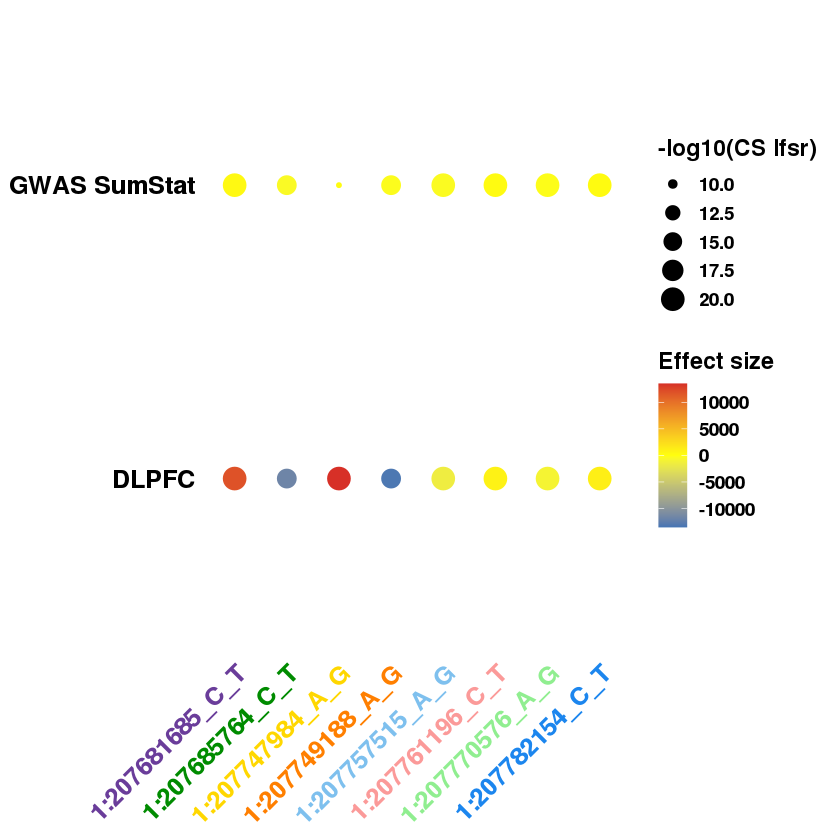

In [108]:
model_bv%>%mvsusie_plot()

In [109]:
which(model_bv$variable_names %in%c )

[1] "1:207682256_C_T" "1:207786170_A_G"

In [115]:
model$coef[c(1596,1737)+1,]

-6953.845,-16784.90,-7190.443,-7254.085
7930.430,22783.49,11429.256,-20397.059


In [2]:
R = readRDS("/mnt/mfs/statgen/neuro-twas/D/cache_arch/cache/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.merged.ld.rds")

In [15]:
R[which(rownames(R) %in% new_cs_snps),which(rownames(R) %in% new_cs_snps) ]

,1:207679455_C_CCT,1:207688746_A_G,1:207764844_G_GA,1:207784968_A_G,1:207785433_A_ACT,1:207786828_A_G,1:207789269_A_G,1:207800862_G_T
1:207679455_C_CCT,1.0000000,0.9891610,-0.108519,-0.0542651,1.0000000,-0.0542651,-0.130390,-0.110100
1:207688746_A_G,0.9891610,1.0000000,-0.112509,-0.0513753,0.9891610,-0.0513753,-0.126315,-0.106705
1:207764844_G_GA,-0.1085190,-0.1125090,1.000000,-0.2987050,-0.1085190,-0.2987050,-0.504329,-0.418953
1:207784968_A_G,-0.0542651,-0.0513753,-0.298705,1.0000000,-0.0542651,1.0000000,0.641346,-0.353457
1:207785433_A_ACT,1.0000000,0.9891610,-0.108519,-0.0542651,1.0000000,-0.0542651,-0.130390,-0.110100
1:207786828_A_G,-0.0542651,-0.0513753,-0.298705,1.0000000,-0.0542651,1.0000000,0.641346,-0.353457
1:207789269_A_G,-0.1303900,-0.1263150,-0.504329,0.6413460,-0.1303900,0.6413460,1.000000,-0.498675
1:207800862_G_T,-0.1101000,-0.1067050,-0.418953,-0.3534570,-0.1101000,-0.3534570,-0.498675,1.000000


In [119]:
input_1$Z%>%arrange(-TWAS_sumstat)%>%mutate(Rank = 1:2494)%>%filter(SNP%in%new_cs_snps_bv)%>%rename(GWAS = TWAS_sumstat)

DLPFC,GWAS,SNP,Rank
<dbl>,<dbl>,<chr>,<int>
0.8675320,1.551913,1:207747984_A_G,255
0.7583726,1.535519,1:207757515_A_G,260
0.7154017,1.366120,1:207770576_A_G,324
0.8675320,-1.423913,1:207749188_A_G,1064
1.0668567,NA,1:207681685_C_T,2095
1.0668567,NA,1:207685764_C_T,2101
0.8090832,NA,1:207761196_C_T,2135
0.6982794,NA,1:207782154_C_T,2147


In [116]:
input_1$bhat%>%nrow
input_1$Z = input_1$bhat/(input_1$sbhat)
input_1$Z = input_1$Z%>%as_tibble()%>%cbind('SNP' = input_1$snps )
R = R[which(rownames(R)%in%input_1$snps),which(colnames(R)%in%input_1$snps)]
input_1$Z = input_1$Z[which(input_1$snps%in%rownames(R)),]
input_1$Z%>%nrow
nrow(R)

[1] 4393

[1] 2494

[1] 2494

In [10]:
bim = read_delim("/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.merged.bim","\t",col_names = F)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_character(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_character(),
  X6 = col_character()
)




In [16]:
bim$X2%>%read.table(text = .,sep = "_")%>%as_tibble%>%mutate(ori_index = 1:nrow(bim))

V1,V2,V3,ori_index
<chr>,<chr>,<chr>,<int>
1:206996355,A,G,1
1:206996384,C,T,2
1:206996552,A,C,3
1:206996894,C,CT,4
1:206997110,A,AG,5
1:206997674,C,T,6
1:206997684,C,T,7
1:206997892,C,G,8
1:206998337,A,G,9


In [4]:
allele.qc = function(a1,a2,ref1,ref2) {
        a1 = toupper(a1)
        a2 = toupper(a2)
        ref1 = toupper(ref1)
        ref2 = toupper(ref2)

	ref = ref1
	flip = ref
	flip[ref == "A"] = "T"
	flip[ref == "T"] = "A"
	flip[ref == "G"] = "C"
	flip[ref == "C"] = "G"
	flip1 = flip

	ref = ref2
	flip = ref
	flip[ref == "A"] = "T"
	flip[ref == "T"] = "A"
	flip[ref == "G"] = "C"
	flip[ref == "C"] = "G"
	flip2 = flip;

	snp = list()
	snp[["keep"]] = !((a1=="A" & a2=="T") | (a1=="T" & a2=="A") | (a1=="C" & a2=="G") | (a1=="G" & a2=="C"))
	snp[["keep"]][ a1 != "A" & a1 != "T" & a1 != "G" & a1 != "C" ] = F
	snp[["keep"]][ a2 != "A" & a2 != "T" & a2 != "G" & a2 != "C" ] = F
	snp[["flip"]] = (a1 == ref2 & a2 == ref1) | (a1 == flip2 & a2 == flip1)

	return(snp)
}

In [9]:
bim$X4

ERROR: Error in eval(expr, envir, enclos): object 'bim' not found


In [12]:
head(GWAS)

variant_id,P,CHR,BP,A1,A2,SNP,GWAS_BETA,GWAS_SE,GWAS_P,SNP_ID
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
rs61769339,0.5322665,1,662622,A,G,rs61769339,-0.1000,0.0457,0.02869,1:662622_A_G
rs190214723,0.8704074,1,693625,T,C,rs190214723,-0.0163,0.0685,0.81200,1:693625_T_C
rs12238997,0.8345078,1,693731,A,G,rs12238997,0.0996,0.0413,0.01598,1:693731_A_G
rs72631875,0.1492660,1,705882,A,G,rs72631875,-0.0184,0.0595,0.75740,1:705882_A_G
rs181440659,0.2091725,1,718505,A,G,rs181440659,-0.1628,0.1362,0.23200,1:718505_A_G
rs116587930,0.7593414,1,727841,A,G,rs116587930,-0.0471,0.0655,0.47220,1:727841_A_G


In [15]:
flip = left_join(bim,GWAS,by = c("X1" = "CHR", "X4" = "BP"))

In [16]:
flip

X1,X2,X3,X4,X5,X6,variant_id,P,A1,A2,SNP,GWAS_BETA,GWAS_SE,GWAS_P,SNP_ID
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,1:206996355_A_G,0,206996355,G,A,rs12096695,0.71814745,A,G,rs12096695,-0.0244,0.0254,0.3367,1:206996355_A_G
1,1:206996384_C_T,0,206996384,T,C,rs142860569,0.09250369,T,C,rs142860569,0.0498,0.0342,0.1460,1:206996384_T_C
1,1:206996552_A_C,0,206996552,C,A,rs115763573,0.85036755,A,C,rs115763573,-0.0040,0.0765,0.9586,1:206996552_A_C
1,1:206996894_C_CT,0,206996894,CT,C,rs201192866,0.36951674,CT,C,rs201192866,-0.0007,0.0474,0.9877,1:206996894_CT_C
1,1:206997110_A_AG,0,206997110,A,AG,1_206997110_AG_A,0.75866753,A,AG,1:206997110_AG_A,-0.0233,0.0766,0.7607,1:206997110_A_AG
1,1:206997674_C_T,0,206997674,T,C,rs145883903,0.79874262,T,C,rs145883903,0.0477,0.0562,0.3964,1:206997674_T_C
1,1:206997684_C_T,0,206997684,T,C,rs74151408,0.85614375,T,C,rs74151408,0.0050,0.0764,0.9474,1:206997684_T_C
1,1:206997892_C_G,0,206997892,G,C,rs2056226,0.54965334,C,G,rs2056226,-0.0006,0.0178,0.9729,1:206997892_C_G
1,1:206998337_A_G,0,206998337,A,G,rs148580938,0.17069946,A,G,rs148580938,0.0085,0.0493,0.8631,1:206998337_A_G


In [17]:
allele.qc(flip$A1,flip$A2,flip$X5,flip$X6)

$keep
   [1]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
  [13] FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE    NA  TRUE  TRUE  TRUE  TRUE
  [25]  TRUE  TRUE  TRUE  TRUE    NA  TRUE    NA  TRUE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE    NA  TRUE FALSE  TRUE  TRUE
  [49]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE    NA    NA
  [61]    NA  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [73]    NA  TRUE  TRUE  TRUE  TRUE    NA FALSE    NA  TRUE  TRUE  TRUE  TRUE
  [85]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
  [97]  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [121] FALSE FALSE  TRUE    NA  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [133]  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
 [145]  TRUE  TRUE  TRUE  TRUE    NA  TRUE  TRUE  TRUE  TRUE  TRUE    NA FALSE
 [157]  TRUE  TRUE    NA  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [169]  TRUE    NA  TRUE    NA FALSE    NA FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [181]  TRUE  TRUE  TRUE  TRUE    NA    NA  TRUE  TRUE FALSE FALSE  TRUE  TRUE
 [193]  TRUE    NA    NA  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [205]  TRUE FALSE FALSE    NA  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE
 [217]  TRUE    NA    NA    NA  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
 [229]  TRUE    NA  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [241]  TRUE    NA  TRUE  TRUE    NA  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
 [253] FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [265]    NA  TRUE  TRUE    NA  TRUE  TRUE  TRUE    NA  TRUE  TRUE  TRUE  TRUE
 [277]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [289]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [301]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE    NA  TRUE FALSE  TRUE
 [313] FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [325]  TRUE  TRUE    NA  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
 [337]  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [349]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [361]  TRUE    NA FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE    NA  TRUE  TRUE
 [373]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [397]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [409]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE    NA  TRUE
 [421]  TRUE    NA  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
 [433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [445]  TRUE  TRUE  TRUE  TRUE    NA  TRUE    NA  TRUE  TRUE  TRUE  TRUE  TRUE
 [457]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE    NA  TRUE  TRUE  TRUE  TRUE FALSE
 [469]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE    NA    NA    NA  TRUE  TRUE
 [481]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [493] FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
 [505]  TRUE    NA  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [517]  TRUE  TRUE    NA FALSE  TRUE  TRUE  TRUE    NA  TRUE  TRUE  TRUE  TRUE
 [529]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [541]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [553] FALSE  TRUE    NA  TRUE  TRUE  TRUE FALSE  TRUE  TRUE    NA FALSE  TRUE
 [565] FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE    NA    NA  TRUE  TRUE
 [577]    NA    NA  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE    NA FALSE FALSE
 [589]    NA  TRUE FALSE  TRUE    NA  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [601]  TRUE  TRUE    NA    NA    NA  TRUE  

In [20]:
flip[allele.qc(flip$A1,flip$A2,flip$X5,flip$X6)$flip,]%>%filter()

X1,X2,X3,X4,X5,X6,variant_id,P,A1,A2,SNP,GWAS_BETA,GWAS_SE,GWAS_P,SNP_ID
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,1:206996355_A_G,0,206996355,G,A,rs12096695,0.7181475,A,G,rs12096695,-0.0244,0.0254,0.3367,1:206996355_A_G
1,1:206996552_A_C,0,206996552,C,A,rs115763573,0.8503676,A,C,rs115763573,-0.0040,0.0765,0.9586,1:206996552_A_C
1,1:206997892_C_G,0,206997892,G,C,rs2056226,0.5496533,C,G,rs2056226,-0.0006,0.0178,0.9729,1:206997892_C_G
1,1:206998706_A_T,0,206998706,A,T,rs2056225,0.7560229,A,T,rs2056225,0.0225,0.0251,0.3699,1:206998706_A_T
1,1:206999490_A_G,0,206999490,G,A,rs74151409,0.8424146,A,G,rs74151409,-0.0031,0.0763,0.9672,1:206999490_A_G
1,1:206999963_C_G,0,206999963,G,C,rs908703,0.4663841,C,G,rs908703,-0.0043,0.0175,0.8053,1:206999963_C_G
1,1:207000060_A_G,0,207000060,G,A,rs908704,0.4496001,A,G,rs908704,-0.0025,0.0177,0.8892,1:207000060_A_G
1,1:207001000_C_T,0,207001000,C,T,rs2883035,0.6149805,T,C,rs2883035,0.0038,0.0174,0.8257,1:207001000_T_C
1,1:207001040_A_C,0,207001040,C,A,rs2352794,0.1653147,A,C,rs2352794,-0.0217,0.0176,0.2176,1:207001040_A_C


In [26]:
flip%>%filter(X4 %in% c(207784968,207679455,207786828))

X1,X2,X3,X4,X5,X6,variant_id,P,A1,A2,SNP,GWAS_BETA,GWAS_SE,GWAS_P,SNP_ID
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,1:207679455_C_CCT,0,207679455,C,CCT,1_207679455_C_CCT,1.399417e-01,CCT,C,1:207679455_CCT_C,0.0845,0.0446,5.806e-02,1:207679455_CCT_C
1,1:207784968_A_G,0,207784968,A,G,rs3818361,4.692884e-22,A,G,rs3818361,0.1402,0.0176,1.717e-15,1:207784968_A_G
1,1:207786828_A_G,0,207786828,A,G,rs2093760,4.378962e-22,A,G,rs2093760,0.1403,0.0176,1.666e-15,1:207786828_A_G


In [17]:
flip

ERROR: Error in eval(expr, envir, enclos): object 'flip' not found


In [34]:
a = read_delim("geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")

ERROR: Error in read_delim("geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds"): could not find function "read_delim"


In [35]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
tb1 = read_delim("~/2021_sept_wrightman_tb1.txt"," ")


── Column specification ────────────────────────────────────────────────────────
cols(
  ensembl_gene_id = col_character(),
  chromosome_name = col_double(),
  start_position = col_double(),
  end_position = col_double(),
  external_gene_name = col_character(),
  path = col_character()
)




In [7]:
tb1

ensembl_gene_id,chromosome_name,start_position,end_position,external_gene_name,path
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSG00000134463,10,11742366,11764070,ECHDC3,geneTpmResidualsAgeGenderAdj_rename.ENSG00000134463
ENSG00000148429,10,11453946,11611754,USP6NL,geneTpmResidualsAgeGenderAdj_rename.ENSG00000148429
ENSG00000064687,19,1039997,1065572,ABCA7,geneTpmResidualsAgeGenderAdj_rename.ENSG00000064687
ENSG00000161929,17,5208920,5234860,SCIMP,geneTpmResidualsAgeGenderAdj_rename.ENSG00000161929
ENSG00000073712,14,52857268,52952435,FERMT2,geneTpmResidualsAgeGenderAdj_rename.ENSG00000073712
ENSG00000110514,11,47269161,47330031,MADD,geneTpmResidualsAgeGenderAdj_rename.ENSG00000110514
ENSG00000029725,17,5282265,5386340,RABEP1,geneTpmResidualsAgeGenderAdj_rename.ENSG00000029725
ENSG00000108091,10,59788747,59906556,CCDC6,geneTpmResidualsAgeGenderAdj_rename.ENSG00000108091
ENSG00000120885,8,27596917,27614700,CLU,geneTpmResidualsAgeGenderAdj_rename.ENSG00000120885


In [6]:
a_u = read_delim("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/analysis_units.txt","\t",col_names = F)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character()
)




In [10]:
tb1_gene = tb1%>%mutate(uni = map_chr(path,~paste(c(.x,".uni_weight"),collapse = "")))

In [15]:
a_u%>%filter(X1%in%tb1_gene$uni)%>%mutate(X1 = str_remove_all(X1,".uni_weight"))%>%write_delim("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/tb1_analysis.txt","\t")

In [16]:
d = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000000419.uni_weight.rds")

In [19]:
d$bhat/d$sbhat

AC,DLPFC,PCC,TWAS_sumstat
1.00355553,0.40523506,-0.66391887,1.045016077
0.10161025,-0.32500066,-0.03076287,-2.065387969
-1.07651698,-1.15730486,-0.43331024,-0.004739336
1.31479536,0.56333139,-0.84379015,-0.885802469
-0.71058403,-2.38180761,-0.98943205,1.000000000
-0.40459458,-0.79903954,0.14154005,0.932011331
1.28869809,-1.01916355,-0.52168888,0.510729614
-0.78957270,-0.72700939,-0.94785221,0.197309417
-0.50887483,0.09907474,-0.55981964,-0.828715365
0.66460174,1.05237928,0.98101063,-0.043674699


In [66]:
GWAS = read_delim("/mnt/mfs/statgen/tl3030/PGCALZ2sumstatsExcluding23andMe.txt.gz","\t")


── Column specification ────────────────────────────────────────────────────────
cols(
  ` chr` = col_double(),
  PosGRCh37 = col_double(),
  testedAllele = col_character(),
  otherAllele = col_character(),
  z = col_double(),
  p = col_double(),
  N = col_double()
)




In [67]:
colnames(GWAS) = c("CHR","BP","A1","A2","Z","P","N")

In [25]:
GWAS = GWAS%>%mutate(SE = 1,SNPS = pmap_chr(list(CHR,BP,A1,A2),function(a,b,c,d) paste(c(a,":",b,"_",c,"_",d),collapse = "")))

In [27]:
GWAS%>%write_delim("/mnt/mfs/statgen/neuro-twas/PGCALZ2sumstatsExcluding23andMe.txt","\t")

In [69]:
GWAS%>%filter(BP == 32446993, CHR == 6 )

CHR,BP,A1,A2,Z,P,N
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
6,32446993,C,T,-4.1349448,3.5504e-05,326505
6,32446993,G,T,-0.3265609,7.4400e-01,74004


In [1]:
bhat = readRDS('/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/Data/GWAS/gwas_sumstat/geneTpmResidualsAgeGenderAdj_rename.ENSG00000108384.uni_weight.rds')

In [2]:
bhat

,Z
17:58195606_T_G,-0.77337581
17:58197164_A_T,-1.54477788
17:58201493_A_G,-1.23079379
17:58204452_C_T,-0.09892225
17:58204490_T_C,0.76814676
17:58204804_T_C,0.68408125
17:58204833_A_G,2.07571905
17:58204847_A_G,1.21560092
17:58205759_C_A,0.89624137
17:58205763_C_A,1.08177033


In [71]:
bhata %>% saveRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.rds")

In [63]:
X = bhata$strong.z
bhata$XtX = t(as.matrix(X)) %*% as.matrix(X) / nrow(X)

In [73]:
k = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.flash.rds")

In [74]:
k

,AC,DLPFC,PCC,GWAS
AC,16.70764564,16.15861587,13.55402703,0.01376075
DLPFC,16.15861587,17.55523751,13.74922346,0.01518383
PCC,13.55402703,13.74922346,11.20855001,0.01186364
GWAS,0.01376075,0.01518383,0.01186364,4.50257317
,AC,DLPFC,PCC,GWAS
AC,3.660164e-01,3.740122e-01,3.035840e-01,-7.488816e-06
DLPFC,3.740122e-01,3.821827e-01,3.102160e-01,-7.652414e-06
PCC,3.035840e-01,3.102160e-01,2.518009e-01,-6.211429e-06
GWAS,-7.488816e-06,-7.652414e-06,-6.211429e-06,1.532237e-10
,AC,DLPFC,PCC,GWAS


In [48]:
XX = X[which(is.finite(X[,4])),]

In [49]:
XX

AC,DLPFC,PCC,GWAS
0.1071796,3.91168799,1.01665257,0.21898577
1.8562003,4.94229793,-0.02134809,1.09418636
-4.3411577,-4.33145940,-6.03578354,1.96712488
3.4211427,1.98026440,1.86672744,-0.88998716
-3.0441788,-4.02593929,-2.50006833,-0.51006081
3.6185189,-1.13531050,1.01718413,0.54157286
-2.7872080,-6.08490709,-1.34813180,-0.04566324
-3.2799619,-1.04537700,0.05621722,5.85226935
-9.0578582,-6.67490169,-6.36011613,0.53570460
-4.7101472,-0.54514171,-0.17837614,1.08312289


In [12]:
which(is.nan(bhata$XtX))

[1]  4  8 12 13 14 15

In [15]:
bhata$strong.z

AC,DLPFC,PCC,GWAS
0.1071796,3.91168799,1.01665257,0.21898577
1.8562003,4.94229793,-0.02134809,1.09418636
-4.3411577,-4.33145940,-6.03578354,1.96712488
3.4211427,1.98026440,1.86672744,-0.88998716
-3.0441788,-4.02593929,-2.50006833,-0.51006081
3.6185189,-1.13531050,1.01718413,0.54157286
-2.7872080,-6.08490709,-1.34813180,-0.04566324
-3.2799619,-1.04537700,0.05621722,5.85226935
-9.0578582,-6.67490169,-6.36011613,0.53570460
-4.7101472,-0.54514171,-0.17837614,1.08312289


In [16]:
 X = bhata$strong.z
    #X[is.na(X)] = 0
t(as.matrix(X)) %*% as.matrix(X)

,AC,DLPFC,PCC,GWAS
AC,374436.8,289783.1,246377.7,NaN
DLPFC,289783.1,386087.9,250984.7,NaN
PCC,246377.7,250984.7,249652.5,NaN
GWAS,NaN,NaN,NaN,Inf


In [37]:
a = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000007047.uni_weight.rds")

In [46]:
a$bhat[!is.finite(Z[,4])]

[1]  0.0134423882  0.0092600167  0.0242869525 -0.0037671894  0.0120748875
  [6]  0.0302899293  0.0157135978  0.0313290247  0.0261466244  0.0157135978
 [11]  0.0300557757  0.0260961086 -0.0811726256 -0.0311737114 -0.0386912791
 [16]  0.0200254759 -0.0435506693 -0.0435506693 -0.0013683921 -0.0032963873
 [21]  0.0028519643 -0.0586176422 -0.0583243783 -0.0583243783 -0.0649904327
 [26]            NA  0.0456701546  0.0442507288  0.0002654921  0.0235540216
 [31]  0.0401182869  0.0066046225  0.0512991141  0.0075929781  0.0574347792
 [36]  0.0512991141  0.0060101787  0.0157972370  0.0268243149  0.0492786002
 [41]  0.0346846907  0.0145241021  0.0516907724  0.0516907724  0.0089809909
 [46]  0.0070630168  0.0115884915  0.0280989388  0.0163712075  0.0163712075
 [51]  0.0219860041            NA  0.0349610895  0.0354953655  0.0105665818
 [56]  0.0319316685  0.0367757309  0.0062803744  0.0307667749  0.0109023647
 [61]  0.0266434869  0.0307667749  0.0102938499  0.0106342229 -0.0081419438
 [66]  0.0545155194  0.0468865704  0.0270928766  0.0632466690  0.0632466690
 [71]  0.0298277038  0.0298277038  0.0278921970  0.0267086941  0.0351325261
 [76]  0.0351325261  0.0340010701            NA           Inf           Inf
 [81]          -Inf          -Inf           Inf           Inf          -Inf
 [86]           Inf           Inf          -Inf          -Inf          -Inf
 [91]           Inf           Inf           Inf          -Inf           Inf
 [96]          -Inf          -Inf          -Inf           Inf           Inf
[101]           Inf          -Inf           Inf          -Inf

In [45]:
Z[!is.finite(Z[,4])]

[1]  0.345895307  0.238264524  0.625072139 -0.096928062  0.310701788
  [6]  0.779698275  0.404350748  0.806471652  0.672966005  0.404350748
 [11]  0.773665417  0.671664932 -2.095434572 -0.802469679 -0.996247854
 [16]  0.515346035 -1.121595024 -1.121595024 -0.035207887 -0.084814399
 [21]  0.073379517 -1.510792253 -1.503207899 -1.503207899 -1.675704912
 [26]           NA  1.331324114  1.289864151  0.007731248  0.686093810
 [31]  1.169203432  0.192333705  1.495822250  0.221117234  1.675291485
 [36]  1.495822250  0.175022208  0.460079897  0.781417023  1.436760058
 [41]  1.010641538  0.422992856  1.507273028  1.507273028  0.261540951
 [46]  0.205683285  0.337484627  0.818576667  0.476800658  0.476800658
 [51]  0.640396901           NA  0.801549202  0.813813828  0.242124322
 [56]  0.732019731  0.843208246  0.143904293  0.705289266  0.249819406
 [61]  0.610695775  0.705289266  0.235874230  0.243674436 -0.186561554
 [66]  1.250967757  1.075489091  0.621003747  1.452070393  1.452070393
 [71]  0.683742781  0.683742781  0.639339262  0.612191456  0.805484557
 [76]  0.805484557  0.779513103           NA          Inf          Inf
 [81]         -Inf         -Inf          Inf          Inf         -Inf
 [86]          Inf          Inf         -Inf         -Inf         -Inf
 [91]          Inf          Inf          Inf         -Inf          Inf
 [96]         -Inf         -Inf         -Inf          Inf          Inf
[101]          Inf         -Inf          Inf         -Inf

In [30]:
which(!is.finite(X[,4]))

[1]   136   144   209   248   255  2417  2418  2419  2421  2425  2427  2439
[13]  3911  4610  4611  4612  4613  4614  4615  4616  4987  4988  4989  6582
[25] 10063 10077 10807 10905 10906 10956 11217 11925 12322 13424 14179 15112
[37] 16283 16385

In [47]:
X[which(is.finite(X[,4])),]

AC,DLPFC,PCC,GWAS
0.1071796,3.91168799,1.01665257,0.21898577
1.8562003,4.94229793,-0.02134809,1.09418636
-4.3411577,-4.33145940,-6.03578354,1.96712488
3.4211427,1.98026440,1.86672744,-0.88998716
-3.0441788,-4.02593929,-2.50006833,-0.51006081
3.6185189,-1.13531050,1.01718413,0.54157286
-2.7872080,-6.08490709,-1.34813180,-0.04566324
-3.2799619,-1.04537700,0.05621722,5.85226935
-9.0578582,-6.67490169,-6.36011613,0.53570460
-4.7101472,-0.54514171,-0.17837614,1.08312289


In [50]:
t(XX)%*%XX

,AC,DLPFC,PCC,GWAS
AC,374393.123,289759.925992,246369.2643,-238.648046
DLPFC,289759.926,386030.522032,250981.4354,-3.439785
PCC,246369.264,250981.435445,249618.1404,120.284322
GWAS,-238.648,-3.439785,120.2843,91769.848521


In [76]:
library(stringr)
rds_files = c('/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.rds','/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.flash.rds','/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.flash_nonneg.rds','/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.pca.rds','/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.canonical.rds')
dat = readRDS(rds_files[1])
U = list(XtX = dat$XtX)
U_scaled = list()
mixture_components =  c('flash','flash_nonneg','pca','canonical')
scale_only =  c('/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss.canonical.rds')
scale_idx = which(mixture_components %in% scale_only )
for (f in 2:length(rds_files) ) {
    if ((f - 1) %in% scale_idx ) {
      U_scaled = c(U_scaled, readRDS(rds_files[f]))
    } else {
      U = c(U, readRDS(rds_files[f]))
    }
}
#
if (FALSE) {
  V = readRDS('.')
} else {
  V = cor(dat$null.z)
}


In [78]:
U

,AC,DLPFC,PCC,GWAS
AC,22.66576599,17.5420708313,14.915199437,-0.0144477568
DLPFC,17.54207083,23.3702943475,15.194420356,-0.0002082447
PCC,14.91519944,15.1944203563,15.111886454,0.0072820149
GWAS,-0.01444776,-0.0002082447,0.007282015,5.5557481851
,AC,DLPFC,PCC,GWAS
AC,16.70764564,16.15861587,13.55402703,0.01376075
DLPFC,16.15861587,17.55523751,13.74922346,0.01518383
PCC,13.55402703,13.74922346,11.20855001,0.01186364
GWAS,0.01376075,0.01518383,0.01186364,4.50257317
,AC,DLPFC,PCC,GWAS


In [67]:
U

,AC,DLPFC,PCC,GWAS
AC,22.61638,17.50321,14.88147,NaN
DLPFC,17.50321,23.32012,15.15975,NaN
PCC,14.88147,15.15975,15.07928,NaN
GWAS,NaN,NaN,NaN,Inf
,AC,DLPFC,PCC,GWAS
AC,16.70764564,16.15861587,13.55402703,0.01376075
DLPFC,16.15861587,17.55523751,13.74922346,0.01518383
PCC,13.55402703,13.74922346,11.20855001,0.01186364
GWAS,0.01376075,0.01518383,0.01186364,4.50257317
,AC,DLPFC,PCC,GWAS


In [80]:
V%>%saveRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/null_z_cor.rds")

In [72]:
get_prior_indices <- function(Z, U) {
  # make sure the prior col/rows match the colnames of the Y matrix
  z_names = colnames(Z)
  u_names = colnames(U)
  if (is.null(z_names) || is.null(u_names)) {
      return(NULL)
  } else if (identical(z_names, u_names)) {
      return(NULL)
  } else {
      return(match(z_names, u_names))
  }
}

library(mvsusieR)
dat = readRDS('/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000196126.uni_weight.rds')
gene_id = "geneTpmResidualsAgeGenderAdj_rename.ENSG00000196126"
if(is.null(dat$ld.file)){
ld_file = paste(c("/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/",gene_id,".merged.ld.rds"),collapse = "")
dat$ld.file = ld_file
}
if(is.null(dat$Z)){
dat$Z = dat$bhat/dat$sbhat
}



if (FALSE == TRUE){
  resid_cor = paste(c("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/residcor_2/",gene_id),collapse = "")
  }else{resid_cor = '/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/null_z_cor.rds'}



V = readRDS(resid_cor)
prior = readRDS('/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.ed.rds')
print(paste("Number of components in the mixture prior:", length(prior$U)))
prior = mvsusieR::create_mash_prior(mixture_prior=list(weights=prior$w, matrices=prior$U), 
                                    include_indices = get_prior_indices(dat$Z, prior$U[[1]]), 
                                    max_mixture_len=-1)
if("original" == 'original'){
    R = readRDS(dat$ld.file)
}else if("original" == 'remove_cov'){
    R = dat$LD
}
    
## Remove the NA SNPs in R
K = na.omit(R)
K = K[,which(colnames(K)%in%rownames(K))]
R = K
    
## Remove duplicated in Z
dat$Z = dat$Z[!duplicated(dat$snps),]
dat$snps = dat$snps[!duplicated(dat$snps)]
    
## Retaining only the overlapping snps

R = R[which(rownames(R)%in%dat$snps),which(colnames(R)%in%dat$snps)]
dat$Z = dat$Z[which(dat$snps%in%rownames(R)),]
dat$snps = dat$snp[which(dat$snps%in%rownames(R))]

## Initiate the computation  
st = proc.time()
mv_res = mvsusieR::mvsusie_rss(dat$Z, R, L=10, 
                               prior_variance=prior, residual_variance=V, 
                               precompute_covariances=T, compute_objective=T, 
                               estimate_prior_variance=T, estimate_prior_method='EM',
                               max_iter = 1000, n_thread=1)
mv_res$time = proc.time() - st
#if(mv_res$convergence$converged == FALSE){
#    stop('Fail to converge.')
#}
mv_res$cs_corr = susieR:::get_cs_correlation(mv_res, Xcorr=R)


[1] "Number of components in the mixture prior: 19"


Warning message in mvsusieR::mvsusie_rss(dat$Z, R, L = 10, prior_variance = prior, :
“NA values in Z-scores are replaced with 0.”
Initializing prior object ...

Number of components in the mixture prior: 13

Warning message in mvsusie_core(data, s_init, L, prior_variance, prior_weights, :
“precompute_covariances option is disabled when prior variances are to be updated.”
Running IBSS algorithm ...

Iteration 1 delta = Inf

Iteration 2 delta = 58045.7064906126

Iteration 3 delta = 246460.062504179

Iteration 4 delta = 794842.282944822



In [35]:
dat$snps = dat$snps[intersect(dat$snps,rownames(K))]

In [39]:
length(dat$snps%>%unique)

[1] 13749

In [51]:
(dat$snps)[c(which(dat$snps%>%duplicated)+1,which(dat$snps%>%duplicated))]

[1] "6:32446994_A_G" "6:32450391_C_T" "6:33039756_A_G" "6:32446993_C_T"
[5] "6:32450343_G_T" "6:33039755_C_T"

In [43]:
dat$Z[c(which(dat$snps%>%sort%>%duplicated)-1,which(dat$snps%>%sort%>%duplicated)),]

AC,DLPFC,PCC,GWAS
11.186575,9.971494,9.064019,-3.6040272
-7.243586,-6.496036,-6.139018,1.7996988
-2.517499,-2.380529,-1.876566,-0.4832664
-6.485245,-7.195062,-6.269599,1.3186659
10.872966,9.849998,8.497145,-2.3419361
-2.640507,-2.458148,-1.978437,-0.7332554


In [54]:
which(!dat$snp%in%(dat$snps%>%unique))

integer(0)

In [57]:
which(duplicated(dat$snps))

[1]  2761  2836 13000

In [63]:
dat$snps[c(2760,2761,2835,2836,12999,13000)]

[1] "6:32446993_C_T" "6:32446993_C_T" "6:32450343_G_T" "6:32450343_G_T"
[5] "6:33039755_C_T" "6:33039755_C_T"

In [65]:
dat$Z[c(2760,2761,2835,2836,12999,13000),]

AC,DLPFC,PCC,GWAS
20.138448,21.1287201,18.9581341,-4.1349448
20.138448,21.1287201,18.9581341,-0.3265609
-1.596351,0.7428925,0.5973627,0.5618702
-1.596351,0.7428925,0.5973627,-0.3296029
-2.752105,-2.4574145,-1.8964683,0.1663265
-2.752105,-2.4574145,-1.8964683,0.1868820


In [ ]:
dat$Z[c(which(dat$snps%>%sort%>%duplicated)-1,which(dat$snps%>%sort%>%duplicated)),]

In [22]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [70]:

dat$Z = dat$Z[!duplicated(dat$snps),]
dat$snps = dat$snps[!duplicated(dat$snps)]

In [71]:
dat$snps%>%length

[1] 13749

In [10]:
dat$Z = dat$Z[which(dat$snps%in%rownames(R)),]
R = R[which(rownames(R)%in%dat$snps),which(colnames(R)%in%dat$snps)]

ERROR: Error in dat$Z[which(dat$snps %in% rownames(R)), ]: subscript out of bounds


In [14]:
which(dat$snps%in%rownames(R))

[1]     1     2     3     4     6     7     8     9    10    11    12    13
   [13]    14    15    16    17    18    21    22    23    24    25    27    28
   [25]    29    30    31    32    33    34    35    36    37    39    40    41
   [37]    42    43    44    45    46    47    48    49    50    51    52    53
   [49]    54    55    56    57    58    59    62    63    64    65    67    68
   [61]    69    70    71    72    73    74    75    76    77    78    80    81
   [73]    82    83    84    85    86    87    88    89    90    91    92    93
   [85]    94    95    96    97    98    99   100   101   103   104   105   106
   [97]   107   108   109   110   111   112   113   114   115   116   117   118
  [109]   119   120   121   122   123   124   125   126   127   128   129   130
  [121]   131   132   133   134   135   136   138   139   140   141   142   143
  [133]   144   146   147   148   149   150   151   152   153   154   155   156
  [145]   157   158   159   160   161   162   163   164   165   166   167   168
  [157]   169   170   171   172   173   174   175   176   177   178   179   180
  [169]   182   183   184   185   186   187   188   189   190   191   192   193
  [181]   194   195   196   197   198   199   200   201   202   203   204   205
  [193]   206   207   208   209   210   211   212   213   214   215   216   217
  [205]   218   219   220   221   222   223   224   225   226   227   228   229
  [217]   230   231   232   233   235   236   237   238   239   240   241   242
  [229]   243   244   245   246   247   248   249   250   251   252   253   254
  [241]   255   256   257   258   259   260   261   262   263   264   265   266
  [253]   267   268   269   270   271   272   273   274   275   276   277   278
  [265]   279   280   281   282   283   284   285   286   287   288   289   290
  [277]   291   292   293   294   295   296   297   298   299   300   301   302
  [289]   303   304   305   306   307   308   309   310   311   312   313   314
  [301]   315   316   317   318   319   320   321   322   323   324   325   326
  [313]   327   328   329   330   331   332   333   334   335   336   337   338
  [325]   339   340   341   342   343   344   345   346   347   348   349   350
  [337]   351   352   353   354   355   356   357   358   359   360   361   362
  [349]   363   364   365   366   367   368   369   370   371   372   373   374
  [361]   375   376   377   378   379   380   381   382   383   384   385   386
  [373]   387   388   389   390   391   392   393   394   395   396   397   398
  [385]   399   400   401   402   403   404   405   406   407   408   409   410
  [397]   411   412   413   414   415   416   417   418   419   420   421   422
  [409]   423   424   425   426   427   428   429   430   431   432   433   434
  [421]   435   436   437   438   439   440   441   442   443   444   445   446
  [433]   447   448   449   450   451   452   453   454   455   456   457   458
  [445]   459   460   461   462   463   464   465   466   467   468   469   470
  [457]   471   472   473   474   475   476   477   478   479   480   481   482
  [469]   483   484   485   486   487   488   489   490   491   492   493   494
  [481]   495   497   498   499   500   501   502   503   504   505   506   507
  [493]   508   509   510   511   512   513   514   515   516   517   518   519
  [505]   520   521   522   523   524   525   526   527   528   529   530   531
  [517]   532   533   534   535   536   537   538   539   540   541   542   543
  [529]   544   545   546   547   548   549   550   551   552   553   554   555
  [541]   556   557   558   559   560   561   562   563   564   565   566   567
  [553]   568   569   570   571   572   573   574   575   576   577   578   579
  [565]   580   581   582   583   584   585   586   587   588   589   590   591
  [577]   592   593   594   595   596   597   598   599   600   601   602   603
  [589]   604   605   606   607   608   609   610   611   612   613   614   615
  [6

In [9]:
K = na.omit(R)
K[,which(colnames(K)%in%rownames(K))]
R = K

,6:32079567_C_T,6:32080383_C_T,6:32080838_A_G,6:32081196_A_C,6:32082661_A_G,6:32083175_C_T,6:32083300_A_G,6:32084020_A_G,6:32085278_C_T,6:32085598_C_T,...,6:33077607_C_T,6:33077861_A_G,6:33078020_C_T,6:33078082_C_T,6:33078163_A_G,6:33078173_C_T,6:33078315_A_G,6:33078476_C_T,6:33078573_G_T,6:33078707_A_G
6:32079567_C_T,1.0000000,-0.110180000,-0.025154400,-0.0733328,-0.025154400,-0.1953440,-0.1287600,-0.05241890,-0.010804200,-0.0294858,...,-0.015909300,-0.02493380,0.062071000,0.053191100,0.062071000,0.01047310,0.01223870,0.01290540,0.000943867,-0.06730350
6:32080383_C_T,-0.1101800,1.000000000,-0.071662600,-0.0868527,-0.071662600,-0.1717770,0.6135270,-0.02996170,-0.000955512,-0.0570881,...,-0.030638800,0.08963280,-0.008654750,-0.024549500,-0.008654750,-0.01803940,-0.01644130,0.06746190,-0.054892400,0.05533440
6:32080838_A_G,-0.0251544,-0.071662600,1.000000000,0.4810210,1.000000000,-0.0684482,0.3298340,-0.02911580,-0.029428400,-0.0372978,...,-0.000786119,0.02800390,-0.078633600,-0.018197000,-0.078633600,0.00385852,0.00482490,0.07567930,0.013134700,0.01146220
6:32081196_A_C,-0.0733328,-0.086852700,0.481021000,1.0000000,0.481021000,-0.1670310,0.7281840,-0.01931430,0.531989000,-0.0766511,...,-0.039264200,0.07737080,-0.013751700,0.000560388,-0.013751700,-0.01077550,-0.01950220,0.05564450,-0.015470900,-0.04641670
6:32082661_A_G,-0.0251544,-0.071662600,1.000000000,0.4810210,1.000000000,-0.0684482,0.3298340,-0.02911580,-0.029428400,-0.0372978,...,-0.000786119,0.02800390,-0.078633600,-0.018197000,-0.078633600,0.00385852,0.00482490,0.07567930,0.013134700,0.01146220
6:32083175_C_T,-0.1953440,-0.171777000,-0.068448200,-0.1670310,-0.068448200,1.0000000,-0.2497410,0.15697100,-0.133288000,-0.1370460,...,-0.075279100,-0.04787920,0.018425500,0.026265100,0.018425500,0.01554100,0.01943330,0.06784450,0.017043300,0.04221370
6:32083300_A_G,-0.1287600,0.613527000,0.329834000,0.7281840,0.329834000,-0.2497410,1.0000000,-0.03631480,0.418331000,-0.1006840,...,-0.047090100,0.12166500,-0.019004900,-0.019383300,-0.019004900,-0.02195240,-0.02773880,0.09269560,-0.050762200,0.00399217
6:32084020_A_G,-0.0524189,-0.029961700,-0.029115800,-0.0193143,-0.029115800,0.1569710,-0.0363148,1.00000000,-0.032033500,0.0287483,...,-0.048297700,-0.02231900,-0.033265100,0.007563110,-0.033265100,0.06288880,0.06393300,0.06400250,0.073085200,-0.00845097
6:32085278_C_T,-0.0108042,-0.000955512,-0.029428400,0.5319890,-0.029428400,-0.1332880,0.4183310,-0.03203350,1.000000000,-0.0626356,...,-0.071103500,0.01957460,0.063088100,0.047621200,0.063088100,0.01213250,-0.00528482,-0.00142976,-0.016580900,-0.02988860
6:32085598_C_T,-0.0294858,-0.057088100,-0.037297800,-0.0766511,-0.037297800,-0.1370460,-0.1006840,0.02874830,-0.062635600,1.0000000,...,0.082872400,-0.01730380,-0.053470200,-0.067735700,-0.053470200,-0.00234250,-0.00121668,-0.04518860,0.008443990,0.02599730


In [99]:
mvsusieR::create_mash_prior(mixture_prior=list(weights=prior$w, matrices=prior$U), 
                                    include_indices = get_prior_indices(dat$Z, prior$U[[1]]), 
                                    max_mixture_len=-1)

ERROR: Error in initialize(...): 'list' object cannot be coerced to type 'double'


In [176]:

prior%>%saveRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.ed.rds")


In [161]:
length(prior$U)

[1] 19

In [174]:
for (i in 2:length(prior$U)){
prior$U[[i]] <- prior$U[[i]]$mat
}

ERROR: Error: $ operator is invalid for atomic vectors


In [168]:
prior$U[[1]] = prior$U[[1]]$mat

In [175]:
prior

,AC,DLPFC,PCC,GWAS
AC,222.8710200,184.1891063,160.60173146,-0.24256327
DLPFC,184.1891063,233.4670774,158.32975164,-0.19240578
PCC,160.6017315,158.3297516,145.76690298,-0.01923346
GWAS,-0.2425633,-0.1924058,-0.01923346,0.75891283
,AC,DLPFC,PCC,GWAS
AC,0.2919307,1.48765323,0.6373701,-0.70439141
DLPFC,1.4876532,9.22597935,3.7947252,0.02678933
PCC,0.6373701,3.79472523,1.5732813,-0.33595461
GWAS,-0.7043914,0.02678933,-0.3359546,10.75389639
,AC,DLPFC,PCC,GWAS


In [79]:
mvsusieR::create_mash_prior(mixture_prior=list(weights=prior$w, matrices=prior$U), 
                                    include_indices = get_prior_indices(dat$Z, prior$U[[1]]), 
                                    max_mixture_len=-1)

ERROR: Error: xUlist[[i]] cannot contain NA values


In [80]:
get_prior_indices(dat$Z, prior$U[[1]])

[1]  1  2  3 NA

In [82]:
prior$U[[1]]

,AC,DLPFC,PCC,TWAS_sumstat
AC,205.668119,167.69479,148.646013,2.7182375
DLPFC,167.694790,213.77062,146.280414,2.6155401
PCC,148.646013,146.28041,133.840291,2.1635930
TWAS_sumstat,2.718237,2.61554,2.163593,0.2182707


In [84]:
a = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.ed_bovy.rds")

## Analysis of tb1 gene result

In [87]:
result = read_delim("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/result_list",col_names = F,delim = " ")


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character()
)




In [94]:
result = result%>%mutate(gene_ID = X1%>%str_remove(c("geneTpmResidualsAgeGenderAdj_rename."))%>%str_remove(".LDoriginal.mvsusierss.rds"),path = X1%>%str_replace("geneT","/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/geneT"))

In [109]:
delta = read_delim("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/delta_recent",col_names = F, " ")


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_double()
)




In [112]:
delta

X1,X2,X3,X4,X5
<chr>,<dbl>,<chr>,<chr>,<dbl>
Iteration,1000,delta,=,1.116550e+02
Iteration,1000,delta,=,4.420485e+02
Iteration,1000,delta,=,6.707600e+02
Iteration,1000,delta,=,3.525148e+02
Iteration,29,delta,=,1.018657e-03
Iteration,276,delta,=,1.043375e-03
Iteration,549,delta,=,1.002642e-03
Iteration,42,delta,=,1.104854e-03
Iteration,1000,delta,=,2.915011e+02


In [113]:
result = result%>%mutate(model = map(path, ~tryCatch(readRDS(.x),error = function(e) return(NA))),
                                                     cs_pos = map(model,~.x$sets$cs),
                                                     cs_snps = map(model,~.x$variable_names[.x$sets$cs%>%unlist]),
                                                    n_of_cs = map(model,~.x$sets$cs%>%length),
                                                    iter = delta$X2,
                                                    delta = delta$X5)

In [115]:
result%>%select(-model,-X1,-path)%>%filter(n_of_cs>0,gene_ID == "ENSG00000203710")

gene_ID,cs_pos,cs_snps,n_of_cs,iter,delta
<chr>,<list>,<list>,<list>,<dbl>,<dbl>
ENSG00000203710,"1135, 1489, 1477","1:207693902_G_T, 1:207868628_A_G, 1:207862359_C_T",3,1000,517.1065


In [119]:
model = (result%>%select(-X1,-path)%>%filter(n_of_cs>0,gene_ID == "ENSG00000203710")%>%pull(model))[[1]]

In [157]:
model$coef[c(1135,1489,1477)+1,]
model$coef[c(1213)+1,]

556.1928,1483.596,765.4311,-1063.592
-15181.8870,-40726.729,-20966.8003,20391.162
14626.0662,39245.561,20202.6264,-19331.253


[1] 0 0 0 0

In [187]:
GWAS%>%filter(BP == 207774882, CHR ==1)

CHR,BP,A1,A2,Z,P,N
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,207774882,G,A,-1.555722,0.1197742,762655


In [135]:
input = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")

In [156]:
which(model$variable_names %in%c("1:207784968_A_G"))

[1] 1213

In [139]:
input$Z = input$bhat/input$sbhat

In [178]:
snps[c(1201,1282,1559,1572)]
input$Z[c(1201,1559,1572),]
input$Z[c(1282),]


[1] "1:207693902_G_T" "1:207784968_A_G" "1:207862359_C_T" "1:207868628_A_G"

AC,DLPFC,PCC,GWAS
-0.06893365,1.519387,-0.08111102,-2.096323
-0.15943785,1.423677,-0.21206000,-1.833814
-0.15943785,1.423677,-0.21206000,1.973296


AC     DLPFC       PCC      GWAS 
 4.048802 11.832710  5.491724 10.032013

In [158]:
get_prior_indices <- function(Z, U) {
  # make sure the prior col/rows match the colnames of the Y matrix
  z_names = colnames(Z)
  u_names = colnames(U)
  if (is.null(z_names) || is.null(u_names)) {
      return(NULL)
  } else if (identical(z_names, u_names)) {
      return(NULL)
  } else {
      return(match(z_names, u_names))
  }
}

library(mvsusieR)
dat = readRDS('/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds')
gene_id = "geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710"
if(is.null(dat$ld.file)){
ld_file = paste(c("/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/",gene_id,".merged.ld.rds"),collapse = "")
dat$ld.file = ld_file
}
if(is.null(dat$Z)){
dat$Z = dat$bhat/dat$sbhat
}



if (FALSE == TRUE){
  resid_cor = paste(c("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/residcor_2/",gene_id),collapse = "")
  }else{resid_cor = '/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/null_z_cor.rds'}



V = readRDS(resid_cor)
prior = readRDS('/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.ed.rds')
print(paste("Number of components in the mixture prior:", length(prior$U)))
prior = mvsusieR::create_mash_prior(mixture_prior=list(weights=prior$w, matrices=prior$U), 
                                    include_indices = get_prior_indices(dat$Z, prior$U[[1]]), 
                                    max_mixture_len=-1)
if("original" == 'original'){
    R = readRDS(dat$ld.file)
}else if("original" == 'remove_cov'){
    R = dat$LD
}

## Remove the NA SNPs in R
#K = na.omit(R)
#K = K[,which(colnames(K)%in%rownames(K))]
#R = K

### Remove duplicated in Z
#dat$Z = dat$Z[!duplicated(dat$snps),]
#dat$snps = dat$snps[!duplicated(dat$snps)]

## Retaining only the overlapping snps

R = R[which(rownames(R)%in%dat$snps),which(colnames(R)%in%dat$snps)]
dat$Z = dat$Z[which(dat$snps%in%rownames(R)),]
dat$snps = dat$snp[which(dat$snps%in%rownames(R))]


## Initiate the computation  
st = proc.time()
mv_res = mvsusieR::mvsusie_rss(dat$Z, R, L=10, 
                               prior_variance=prior, residual_variance=V, 
                               precompute_covariances=T, compute_objective=T, 
                               estimate_prior_variance=T, estimate_prior_method='EM',
                               max_iter = 1000, n_thread=1)
mv_res$time = proc.time() - st
#if(mv_res$convergence$converged == FALSE){
#    stop('Fail to converge.')
#}
mv_res$cs_corr = susieR:::get_cs_correlation(mv_res, Xcorr=R)
saveRDS(mv_res, '/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/test/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds')

[1] "Number of components in the mixture prior: 19"


ERROR: Error in initialize(...): 'list' object cannot be coerced to type 'double'


In [159]:
prior

,AC,DLPFC,PCC,GWAS
AC,222.8710200,184.1891063,160.60173146,-0.24256327
DLPFC,184.1891063,233.4670774,158.32975164,-0.19240578
PCC,160.6017315,158.3297516,145.76690298,-0.01923346
GWAS,-0.2425633,-0.1924058,-0.01923346,0.75891283
,AC,DLPFC,PCC,GWAS
AC,0.2919307,1.48765323,0.6373701,-0.70439141
DLPFC,1.4876532,9.22597935,3.7947252,0.02678933
PCC,0.6373701,3.79472523,1.5732813,-0.33595461
GWAS,-0.7043914,0.02678933,-0.3359546,10.75389639
,AC,DLPFC,PCC,GWAS


In [179]:
alt_model = readRDS("geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds")

Warning message in gzfile(file, "rb"):
“cannot open compressed file 'geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds', probable reason 'No such file or directory'”


ERROR: Error in gzfile(file, "rb"): cannot open the connection


In [180]:
for(i in 1:length(prior$U)){
    colnames(prior$U[[i]])[4] = rownames(prior$U[[i]])[4] = "GWAS"
    
}

In [181]:
prior

,AC,DLPFC,PCC,GWAS
AC,222.8710200,184.1891063,160.60173146,-0.24256327
DLPFC,184.1891063,233.4670774,158.32975164,-0.19240578
PCC,160.6017315,158.3297516,145.76690298,-0.01923346
GWAS,-0.2425633,-0.1924058,-0.01923346,0.75891283
,AC,DLPFC,PCC,GWAS
AC,0.2919307,1.48765323,0.6373701,-0.70439141
DLPFC,1.4876532,9.22597935,3.7947252,0.02678933
PCC,0.6373701,3.79472523,1.5732813,-0.33595461
GWAS,-0.7043914,0.02678933,-0.3359546,10.75389639
,AC,DLPFC,PCC,GWAS


In [182]:
resid_cor = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/residcor_2/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710")

In [183]:
resid_cor

1.0013997,0.5704953,0.3140488,0
0.5704953,1.0081887,0.3682478,0
0.3140488,0.3682478,0.9970217,0
0.0000000,0.0000000,0.0000000,1


In [188]:
c("1:207762775_C_T","1:207789471_C_T","1:207782769_A_G","1:207757393_A_G",
 "1:207697506_C_T", "1:207783507_C_T", "1:207772154_C_T", "1:207762674_A_G")

[1] "1:207762775_C_T" "1:207789471_C_T" "1:207782769_A_G" "1:207757393_A_G"
[5] "1:207697506_C_T" "1:207783507_C_T" "1:207772154_C_T" "1:207762674_A_G"

In [189]:
cs_snps = c("1:207762775_C_T","1:207789471_C_T","1:207782769_A_G","1:207757393_A_G",
 "1:207697506_C_T", "1:207783507_C_T", "1:207772154_C_T", "1:207762674_A_G")

In [191]:
which(input$snps%in%cs_snps)

[1] 1205 1238 1248 1249 1266 1279 1281 1294

In [192]:
input$Z[which(input$snps%in%cs_snps),]

AC,DLPFC,PCC,GWAS
-0.791105694,-0.72235674,-1.2190735,-0.02191427
0.114573006,0.01665601,-0.3747902,-2.35145732
0.139690768,0.80908316,0.4892455,-1.46092967
-0.791105694,-0.72235674,-1.2190735,0.02815130
0.004430121,0.71540166,0.5363334,-1.55745375
0.114573006,0.01665601,-0.3747902,-2.39238681
-0.028084693,0.73868473,0.5955635,1.60394847
0.019774994,0.90919049,0.4787050,1.52406542


In [193]:
input_ori = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/RDS//geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")

In [195]:
input_ori$Z = input_ori$bhat/input_ori$sbhat

In [200]:
rownames(input_ori$Z) = input_ori$snps

In [202]:
z_ori = input_ori$Z%>%as_tibble(rownames = "snp")

In [205]:
rownames(input$Z) = input$snps
Z_ori = input$Z%>%as_tibble(rownames = "snp")

In [206]:
Z  = z_ori

In [207]:
Z = Z_ori

In [212]:
comp = left_join(z_ori,Z,by= "snp")

In [215]:
comp = comp%>%select(snp,GWAS_Feb = TWAS_sumstat,GWAS)%>%na.omit

In [217]:
lm(GWAS_Feb ~ GWAS,data = comp )%>%summary


Call:
lm(formula = GWAS_Feb ~ GWAS, data = comp)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3286 -0.4320  0.0158  0.4674  2.3854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.03460    0.02296  -1.507    0.132    
GWAS         0.79603    0.01127  70.641   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8069 on 1235 degrees of freedom
Multiple R-squared:  0.8016,	Adjusted R-squared:  0.8015 
F-statistic:  4990 on 1 and 1235 DF,  p-value: < 2.2e-16


In [218]:
prior_alt = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss.ed_bovy_eqtl.rds")

In [222]:
colnames(input_ori$bhat) = colnames(input_ori$sbhat) = c("AC","DLPFC","PCC","GWAS")

In [224]:
input_ori%>%saveRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/test/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")